In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import datetime
from datetime import datetime
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [3]:
def outliers_iqr(ys):
    """Функция определяет межквартильный интервал и возвращает 1.5 межквартильных расстояния с обеих
 сторон от этого интервала. С её помощью избавимся от выбросов."""
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)

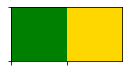

In [5]:
colors = ['green', 'gold']
sns.palplot(sns.color_palette(colors))

## Оработка данных

Загрузим наши данные и посмотрим на них:

In [6]:
df1 = pd.read_csv('tab1.csv')
df2 = pd.read_csv('tab2.csv')

In [7]:
df1.head()

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,2019,15.01.2020,январь,Flatingo,Интеграция,GD,Кодинг,52 027,42 225,р.4 500,р.15,"0,72%",304,"11,2%",34.00000,"0,0%",0,0,р.132,-100%,https://www.youtube.com/watch?v=aqSjawK_QwA,NaN,NaN,NaN
1,2020,15.01.2020,январь,Johe News,Интеграция,PWS,Кодинг,9 000,6 389,р.5 000,р.40,"1,94%",124,"4,0%",5.00000,"0,0%",0,0,р.1 000,-100%,https://www.youtube.com/watch?v=o7h1-6U1u1g&t=...,NaN,NaN,NaN
2,2020,15.01.2020,январь,PRO роботов,Интеграция,DST,Data Science,38 000,6 900,р.7 500,р.46,"2,38%",164,"7,9%",13.00000,"23,1%",3,4,р.577,3380%,https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...,NaN,NaN,NaN
3,2020,15.01.2020,январь,Хауди Хо,Интеграция,PWS,Кодинг,842 000,50 000,р.25 000,р.15,"3,39%",1697,"6,5%",111.00000,"5,4%",6,4,р.225,1044%,https://youtu.be/M8fhrtvedHA,NaN,NaN,NaN
4,2020,15.01.2020,январь,Foo52ru,Интеграция,DST,Data Science,35 000,22 000,р.25 000,р.60,"1,90%",418,"4,3%",18.00000,"11,1%",2,3,р.1 389,620%,https://www.youtube.com/watch?v=J9ZgrTAFw60,NaN,NaN,NaN


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   год                   587 non-null    int64  
 1   Дата                  587 non-null    object 
 2   Месяц                 587 non-null    object 
 3   Название              587 non-null    object 
 4   Формат                587 non-null    object 
 5   Тег (курс)            587 non-null    object 
 6   Линейка               587 non-null    object 
 7   Подписчики            575 non-null    object 
 8   Охват Факт            579 non-null    object 
 9   Расход                587 non-null    object 
 10  CPC                   578 non-null    object 
 11  СTR                   577 non-null    object 
 12  Визиты Факт           575 non-null    object 
 13  С1 Факт               576 non-null    object 
 14  Заявки Факт           569 non-null    float64
 15  С2 Факт               5

In [9]:
# Переименуем столбцы
df1 = df1.rename(columns={'Ссылка на размещение':'link','Охват Факт':'Охват_Факт','Тег (курс)':'Тег_(курс)',
                          'Визиты Факт':'Визиты_Факт','Заявки Факт':'Заявки_Факт','Оплаты Факт':'Оплаты_Факт',
                         'С1 Факт':'С1_Факт','С2 Факт':'С2_Факт'})

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   link                               588 non-null    object 
 1   channel_name                       588 non-null    object 
 2   channel_subscribers                587 non-null    float64
 3   video_name                         588 non-null    object 
 4   video_date                         588 non-null    object 
 5   video_year                         588 non-null    int64  
 6   video_month                        588 non-null    object 
 7   day_of_week                        588 non-null    object 
 8   views                              588 non-null    int64  
 9   video_duration                     588 non-null    object 
 10  time_of_advertisement              587 non-null    object 
 11  part_of_video_with_ad_from1_to_10  587 non-null    float64

Заметим, что данные можно объединить по столбцу 'link', обработаем его в обеих таблицах, чтобы получить больше пересечений

In [11]:
df2['link_true'] = df2['link'].apply(lambda x: x.split('=')[1])

In [12]:
df1['link_true'] = df1['link'].apply(lambda x: x.split('=')[1] if '=' in x else x)
df1['link_true'] = df1['link_true'].apply(lambda x: x.split('&')[0] if '&' in x else x)
df1['link_true'] = df1['link_true'].apply(lambda x: x.split('/')[3] if 'https' in x else x)
df1['link_true'] = df1['link_true'].apply(lambda x: x.split('#')[0] if '#' in x else x)

In [13]:
num_links = [137,192,276,354,358,359,361,363,368,373,383,
            408,410,412,413,414,420,425,435,440,446,448,
             450,457,469,473,479,480,481,482,484,485,486,
            488,494,499,510,511,514,519,522,530,533,538,
             539,540,548,549,550,551,553,555,556,558,561,
             571,572,576,578,579,581,583,585
            ]

In [14]:
for i in num_links:
    k = df1.link[i].split('/')[3][0:11]
    df1['link_true'][i] = k

<ipython-input-14-2cc6a3e65a91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['link_true'][i] = k


Объединим данные по новому столбцу 'link_true'

In [15]:
data = pd.merge(df1,df2, on = 'link_true', how = 'left')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 586
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   год                                587 non-null    int64  
 1   Дата                               587 non-null    object 
 2   Месяц                              587 non-null    object 
 3   Название                           587 non-null    object 
 4   Формат                             587 non-null    object 
 5   Тег_(курс)                         587 non-null    object 
 6   Линейка                            587 non-null    object 
 7   Подписчики                         575 non-null    object 
 8   Охват_Факт                         579 non-null    object 
 9   Расход                             587 non-null    object 
 10  CPC                                578 non-null    object 
 11  СTR                                577 non-null    object 

## Работа с пропусками

год - 0.0%
Дата - 0.0%
Месяц - 0.0%
Название - 0.0%
Формат - 0.0%
Тег_(курс) - 0.0%
Линейка - 0.0%
Подписчики - 2.0%
Охват_Факт - 1.0%
Расход - 0.0%
CPC - 2.0%
СTR - 2.0%
Визиты_Факт - 2.0%
С1_Факт - 2.0%
Заявки_Факт - 3.0%
С2_Факт - 0.0%
Оплаты_Факт - 3.0%
Доход - 0.0%
CPL - 7.0%
ROMI - 13.0%
link_x - 0.0%
Unnamed: 21 - 100.0%
Unnamed: 22 - 100.0%
Unnamed: 23 - 97.0%
link_true - 0.0%
link_y - 3.0%
channel_name - 3.0%
channel_subscribers - 3.0%
video_name - 3.0%
video_date - 3.0%
video_year - 3.0%
video_month - 3.0%
day_of_week - 3.0%
views - 3.0%
video_duration - 3.0%
time_of_advertisement - 3.0%
part_of_video_with_ad_from1_to_10 - 3.0%
video_category - 3.0%
comments - 3.0%
likes - 3.0%
dislikes - 3.0%
tags - 7.0%
description - 3.0%
promocode - 13.0%
discount_percentage - 12.0%
discount_until_date - 28.0%
ER - 3.0%


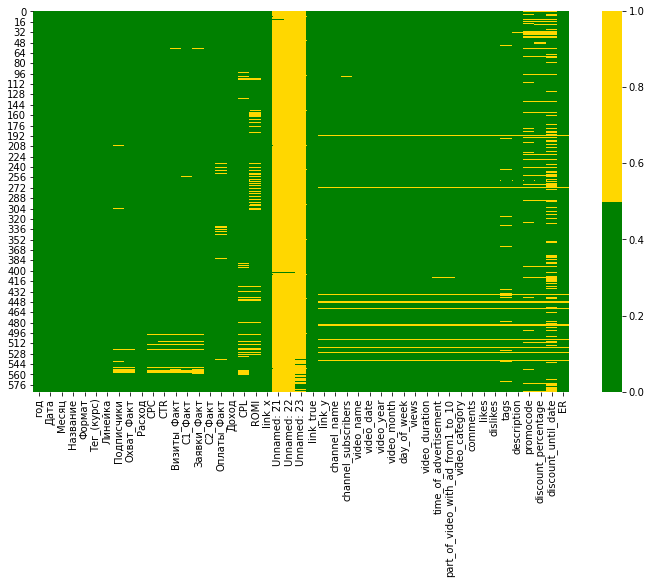

In [17]:
cols = data.columns
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colors))

# Количество пропусков в процентах по столбцам:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

Очень большое количество пропусков в столбцах Unnamed: 21,Unnamed: 22,Unnamed: 23. Почти 100% , для анализа они нам не пригодятся, удалим их

In [18]:
data = data.drop(['Unnamed: 21','Unnamed: 22','Unnamed: 23'], axis = 1)

## Анализ данных

In [19]:
data.head()

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER
0,2019,15.01.2020,январь,Flatingo,Интеграция,GD,Кодинг,52 027,42 225,р.4 500,р.15,"0,72%",304,"11,2%",34.00000,"0,0%",0,0,р.132,-100%,https://www.youtube.com/watch?v=aqSjawK_QwA,aqSjawK_QwA,https://www.youtube.com/watch?v=aqSjawK_QwA,Flatingo. Разработчик игр,270000.00000,Как разработчики делят игры / Создание игр и и...,2019-01-14 4:23:02,2019.00000,January,Monday,107619.00000,3M46S,00m02,1.00000,Игры,405.00000,3548.00000,320.00000,"['флатинго', 'flatingo', 'Новичков андрей', 'р...",# Игровые ассеты 2D и 3D - https://craftpix.pa...,NaN,NaN,NaN,"1,58%"
1,2020,15.01.2020,январь,Johe News,Интеграция,PWS,Кодинг,9 000,6 389,р.5 000,р.40,"1,94%",124,"4,0%",5.00000,"0,0%",0,0,р.1 000,-100%,https://www.youtube.com/watch?v=o7h1-6U1u1g&t=...,o7h1-6U1u1g,https://www.youtube.com/watch?v=o7h1-6U1u1g,Johe News,14600.00000,Raspberry Pi лучшие проекты,2020-01-17 11:58:16,2020.00000,January,Friday,62889.00000,31M41S,02m42,2.00000,Наука и технологии,366.00000,1955.00000,700.00000,"['программирование', 'tech', 'webdev', 'progra...","Если захотите купить крипту, моя рефералка на ...",NaN,NaN,NaN,"20,69%"
2,2020,15.01.2020,январь,PRO роботов,Интеграция,DST,Data Science,38 000,6 900,р.7 500,р.46,"2,38%",164,"7,9%",13.00000,"23,1%",3,4,р.577,3380%,https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...,mk8OsCBZ-yw,https://www.youtube.com/watch?v=mk8OsCBZ-yw,PRO роботов,136000.00000,"20+ Самых Невероятных Изобретений, Которые Изм...",2020-01-23 13:33:38,2020.00000,January,Thursday,112566.00000,10M14S,04m13,5.00000,Наука и технологии,493.00000,2866.00000,210.00000,"['технология', 'новые технологии', 'современны...","20+ Самых Невероятных Изобретений, Которые Изм...",PRO Роботов,25,15.02.2020,"2,62%"
3,2020,15.01.2020,январь,Хауди Хо,Интеграция,PWS,Кодинг,842 000,50 000,р.25 000,р.15,"3,39%",1697,"6,5%",111.00000,"5,4%",6,4,р.225,1044%,https://youtu.be/M8fhrtvedHA,M8fhrtvedHA,https://www.youtube.com/watch?v=M8fhrtvedHA,Хауди Хо™ - Просто о мире IT!,1560000.00000,Пишем TELEGRAM бота на Python,2020-01-24 18:33:25,2020.00000,January,Friday,560514.00000,12M58S,06m52,6.00000,Наука и технологии,2404.00000,22013.00000,668.00000,"['python', 'бот', 'telegram', 'телеграм', 'как...",Урок как создать Telegram бота с нуля.\nНа язы...,NaN,40,31.01.2020,"1,61%"
4,2020,15.01.2020,январь,Foo52ru,Интеграция,DST,Data Science,35 000,22 000,р.25 000,р.60,"1,90%",418,"4,3%",18.00000,"11,1%",2,3,р.1 389,620%,https://www.youtube.com/watch?v=J9ZgrTAFw60,J9ZgrTAFw60,https://www.youtube.com/watch?v=J9ZgrTAFw60,foo52ru ТехноШаман,62100.00000,Нейронная сеть. Часть 6. Прикручиваю нейросеть...,2020-01-24 4:44:31,2020.00000,January,Friday,59620.00000,9M23S,00m43,2.00000,Наука и технологии,264.00000,4422.00000,68.00000,"['нейросеть', 'нейронные сети', 'pixilang']",Специализация Data Science в SkillFactory: htt...,foo52ru,25,15.02.2020,"7,66%"


В качестве целевой переменной я выбрал 'ROMI'-Коэффициент возрата инвестиций. Он более показателен чем Оплаты или Доход, так как он учитывает затараченные на рекламу средства и показывает "чистый выхлоп". 

По условию у нас ошибки в столбцах 'Дата'и 'Месяц' пока оставим их без рассмотрения

Выделим числовые столбцы:

In [20]:
#num_cols = ['Подписчики','Охват_Факт','Расход','CPC', 'СTR', 'Визиты_Факт',
          #  'С1_Факт','С2_Факт','Оплаты_Факт','Доход','CPL','ROMI',
           # 'channel_subscribers','views','time_of_advertisement',
          # 'comments','likes','dislikes','part_of_video_with_ad_from1_to_10'
         #  'discount_percentage','ER']


Приведем эти столбцы к числовому виду, так как часто их тип это -object

In [21]:
data['Подписчики2'] = data['Подписчики'].replace(r'\s+','',regex=True)
data['Подписчики2'] = data['Подписчики2'].astype(np.float64)

In [22]:
data['Подписчики2'].isna().sum()

12

In [23]:
data['Подписчики2'].describe()

count        575.00000
mean      749422.80522
std      1303927.25059
min         1000.00000
25%       166000.00000
50%       439000.00000
75%       842000.00000
max     18300000.00000
Name: Подписчики2, dtype: float64

In [24]:
#Заменим пропуски на ноль, по рекомендации заказчика
data['Подписчики2'].fillna(0,inplace=True)

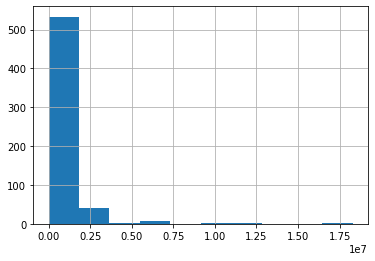

In [25]:
data['Подписчики2'].hist()

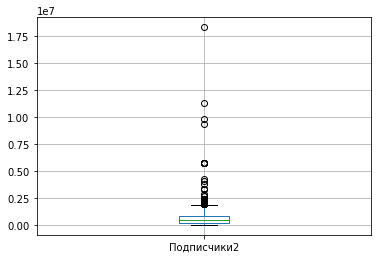

In [26]:
data.boxplot(column=['Подписчики2'])

In [27]:
#Посмотрим на выбросы:
data[data['Подписчики2']>7200000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2
92,2020,18.06.2020,июнь,Редакция,Интеграция,DSPR,Data Science,11250000,1 700 000,р.550 000,р.284,"0,11%",1934,"4,19%",81.00000,"19,8%",16,8,р.6 790,208%,https://www.youtube.com/watch?v=w5At9uSbc0o,w5At9uSbc0o,https://www.youtube.com/watch?v=w5At9uSbc0o,Редакция,2150000.00000,25 лет освобождению заложников в Будённовске /...,2020-07-02 11:37:26,2020.00000,July,Thursday,3422812.00000,1H39M29S,03m08,1.00000,Люди и блоги,15837.00000,118444.00000,3773.00000,"['редакция', 'пивоваров', 'алексей пивоваров',...",Рекламный партнер: Skillfactory.\n\nhttps://cl...,РЕДАКЦИЯ,50,15.07.2020,"6,42%",11250000.00000
117,2020,03.07.2020,июль,wylsa.com,Интеграция,PWS,Кодинг,9 300 000,268 000,р.250 000,р.207,"0,45%",1206,"3,65%",44.00000,"6,8%",3,4,р.5 682,-8%,https://www.youtube.com/watch?v=l2pcUBxugcY&fe...,l2pcUBxugcY,https://www.youtube.com/watch?v=l2pcUBxugcY,Wylsacom,9860000.00000,iPhone с Авито - как купить без обмана?,2020-07-25 16:36:55,2020.00000,July,Saturday,309745.00000,12M55S,01m54,2.00000,Наука и технологии,15398.00000,23993.00000,2619.00000,"['iPhone', 'Apple', 'wylsa', 'Wylsacom', 'авит...",Курс «Python для веб-разработки» в SkillFactor...,WYLSA,50,10.08.2020,"0,43%",9300000.00000
180,2020,16.08.2020,август,Редакция,Интеграция,DAPR,Аналитика,9 830 000,1 486 873,р.530 000,р.265,"0,13%",2000,"7,00%",140.00000,"9,3%",13,8,р.3 786,91%,https://www.youtube.com/watch?v=vAhlHjUKLSA,vAhlHjUKLSA,https://www.youtube.com/watch?v=vAhlHjUKLSA,Редакция,2150000.00000,"Редакция. News: протесты в Беларуси, лекарство...",2020-08-16 8:39:31,2020.00000,August,Sunday,1501496.00000,22M5S,03m14,2.00000,Люди и блоги,7969.00000,87836.00000,4493.00000,"['редакция', 'пивоваров', 'алексей пивоваров',...",Профессия «Аналитик данных» в SkillFactory\nht...,Редакция,50,02.09.2020,"4,67%",9830000.00000
234,2020,13.09.2020,сентябрь,Варламов,Интеграция,PWS,Кодинг,18 300 000,577 287,р.570 000,р.748,"0,13%",762,"4,72%",36.00000,"25,0%",9,7,р.15 833,0%,https://www.youtube.com/watch?v=gaMTD093uEg&t=...,gaMTD093uEg,https://www.youtube.com/watch?v=gaMTD093uEg,varlamov,2450000.00000,Чё Происходит #26 | Симоньян на поклоне у Лука...,2020-09-13 13:39:57,2020.00000,September,Sunday,606076.00000,1H47M31S,17m33,3.00000,Новости и политика,4234.00000,35360.00000,1385.00000,"['варламов', 'чп', 'чё происходит', 'валамов ч...",Лукашенко дал интервью российским пропагандист...,Варламов,45,10.10.2020,"1,67%",18300000.00000


In [28]:
# 234 Варламов явно опечатка, если пройти по ссылке сейчас на канале 2.5млн подписчиков, заменим значение
data['Подписчики2'] = data['Подписчики2'].replace(18300000,1830000)                           

In [29]:
# 92 Редакция опечатка, на канале сейчас 2.18 млн подписчиков
data['Подписчики2'] = data['Подписчики2'].replace(11250000,1125000)
# 180 Редакция опечатка, на канале сейчас 2.18 млн подписчиков
data['Подписчики2'] = data['Подписчики2'].replace(9830000,983000)

In [30]:
# 117 wylsa.com, оставим значение, на канале сейчас 9.88 млн подписчиков

In [31]:
data[data['Подписчики2']>7000000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2
117,2020,03.07.2020,июль,wylsa.com,Интеграция,PWS,Кодинг,9 300 000,268 000,р.250 000,р.207,"0,45%",1206,"3,65%",44.00000,"6,8%",3,4,р.5 682,-8%,https://www.youtube.com/watch?v=l2pcUBxugcY&fe...,l2pcUBxugcY,https://www.youtube.com/watch?v=l2pcUBxugcY,Wylsacom,9860000.00000,iPhone с Авито - как купить без обмана?,2020-07-25 16:36:55,2020.00000,July,Saturday,309745.00000,12M55S,01m54,2.00000,Наука и технологии,15398.00000,23993.00000,2619.00000,"['iPhone', 'Apple', 'wylsa', 'Wylsacom', 'авит...",Курс «Python для веб-разработки» в SkillFactor...,WYLSA,50,10.08.2020,"0,43%",9300000.00000


In [32]:
data['Охват_Факт2'] = data['Охват_Факт'].replace(r'\D+','',regex=True)
data['Охват_Факт2'] = data['Охват_Факт2'].astype(np.float64)

In [33]:
data['Охват_Факт2'].describe()

count        579.00000
mean      258635.72021
std       542210.44286
min          269.00000
25%        54380.50000
50%       150526.00000
75%       264187.00000
max     10000000.00000
Name: Охват_Факт2, dtype: float64

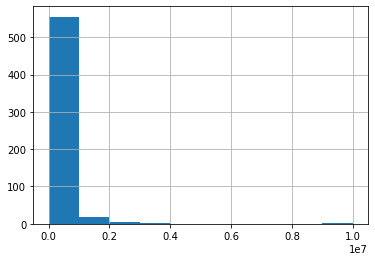

In [34]:
data['Охват_Факт2'].hist()

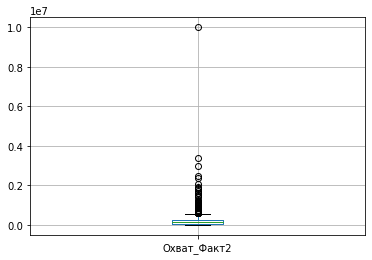

In [35]:
data.boxplot(column=['Охват_Факт2'])

In [36]:
data[data['Охват_Факт2']>5000000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2
196,2020,25.08.2020,август,The Люди,Интеграция,DSPR,Data Science,2 230 000,10 000 000,р.860 000,р.146,"0,06%",5905,"3,61%",213.00000,"6,1%",13,8,р.4 038,53%,https://www.youtube.com/watch?v=enRlWWHEoiU&t=...,enRlWWHEoiU,https://www.youtube.com/watch?v=enRlWWHEoiU,The Люди,3480000.00000,Мексика / Горячие точки Нарковойны Мафии / Как...,2020-08-25 7:00:54,2020.00000,August,Tuesday,11308890.00000,1H22M5S,22m05,4.00000,Люди и блоги,25833.00000,336394.00000,10746.00000,"['мексика', 'мексиканец', 'наркобароны', 'карт...","Оформить кредитную карту ""100 дней без процент...",Лядов,45,31.08.2020,"10,72%",2230000.00000,10000000.00000


In [37]:
# 196 явная ошибка судя по данным  охват соизмерим с количеством подписчиков, заменим
data['Охват_Факт2'] = data['Охват_Факт2'].replace(10000000,1000000)

In [38]:
data['Охват_Факт2'].isna().sum()

8

In [39]:
#Заменим пропуски на ноль
data['Охват_Факт2'].fillna(0,inplace=True)

In [40]:
data['Расход2'] = data['Расход'].replace(r'\D+','',regex=True)
data['Расход2'] = data['Расход2'].astype(np.float64)

In [41]:
data['Расход2'].describe()

count      587.00000
mean    116597.01022
std     136429.23289
min          0.00000
25%      30000.00000
50%      75600.00000
75%     140000.00000
max     860000.00000
Name: Расход2, dtype: float64

In [42]:
# Все расходы занесены в таблицу точно, пустых значений нет
data['Расход2'].isna().sum()

0

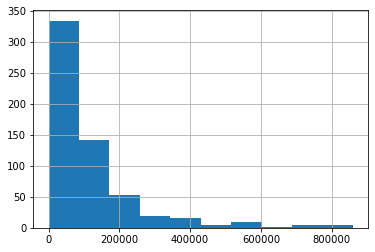

In [43]:
data['Расход2'].hist()

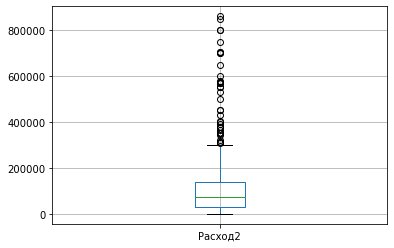

In [44]:
data.boxplot(column=['Расход2'])

In [45]:
data[data['Расход2']>750000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2
196,2020,25.08.2020,август,The Люди,Интеграция,DSPR,Data Science,2 230 000,10 000 000,р.860 000,р.146,"0,06%",5905,"3,61%",213.00000,"6,1%",13,8,р.4 038,53%,https://www.youtube.com/watch?v=enRlWWHEoiU&t=...,enRlWWHEoiU,https://www.youtube.com/watch?v=enRlWWHEoiU,The Люди,3480000.00000,Мексика / Горячие точки Нарковойны Мафии / Как...,2020-08-25 7:00:54,2020.00000,August,Tuesday,11308890.00000,1H22M5S,22m05,4.00000,Люди и блоги,25833.00000,336394.00000,10746.00000,"['мексика', 'мексиканец', 'наркобароны', 'карт...","Оформить кредитную карту ""100 дней без процент...",Лядов,45,31.08.2020,"10,72%",2230000.00000,1000000.00000,860000.00000
551,2021,09.04.2021,апрель,The Люди,Интеграция,DST,Data science,3 310 000,2 375 000,р.800 000,р.322,"0,10%",2 488,"3,90%",97.00000,"9,3%",9,7,р.8 247,10%,https://youtu.be/lEAB2zeI5Co?t=1122,lEAB2zeI5Co,https://www.youtube.com/watch?v=lEAB2zeI5Co,The Люди,3480000.00000,СССР - США / Секретная военная База на границе...,2021-04-09 7:00:20,2021.00000,April,Friday,2575994.00000,33M12S,18m42,7.00000,Люди и блоги,8142.00000,109977.00000,5360.00000,"['the люди', 'люди', 'как живут люди', 'интерв...",Получи 60 дней подписки Яндекс Плюс бесплатно ...,Лядов,45,NaN,"3,55%",3310000.00000,2375000.00000,800000.00000
568,2021,20.04.2021,апрель,Редакция,Интеграция,линейка кодинга,Кодинг,1 940 000,1001500,р.850 000,р.596,"0,14%",1426,"2,45%",35.00000,"28,6%",10,7,р.24 286,-34%,https://www.youtube.com/watch?v=Znm9UlsFm5k&t=...,Znm9UlsFm5k,https://www.youtube.com/watch?v=Znm9UlsFm5k,Редакция,2150000.00000,Что происходит в Крыму 7 лет спустя / Редакция...,2021-04-20 8:35:56,2021.00000,April,Tuesday,2120581.00000,1H4M11S,05m05,2.00000,Люди и блоги,16833.00000,65775.00000,6144.00000,"['редакция', 'пивоваров', 'алексей пивоваров',...",- 45% на все курсы программирования в SkillFac...,РЕДАКЦИЯ,45,NaN,"4,13%",1940000.00000,1001500.00000,850000.00000
586,2021,30.04.2021,апрель,The Люди,Интеграция,FPW,Кодинг,3 310 000,3400000,р.800 000,р.330,"0,07%",2 423,"22,37%",542.00000,"1,1%",6,5,р.1 476,-58%,https://www.youtube.com/watch?v=JJblj5OX9fA&t=...,JJblj5OX9fA,https://www.youtube.com/watch?v=JJblj5OX9fA,The Люди,3480000.00000,Самый Брошенный город / Воркута / Как живут в ...,2021-04-30 8:20:09,2021.00000,April,Friday,3581039.00000,46M28S,04m05,2.00000,Люди и блоги,32302.00000,180605.00000,5243.00000,"['the люди', 'люди', 'как живут люди', 'интерв...",‎️‍🔥 Получи 90 тыс на обучение профессии Fulls...,NaN,NaN,NaN,"6,27%",3310000.00000,3400000.00000,800000.00000


'CPC2'-Цена одного визита 

In [46]:
data['CPC2'] = data['CPC'].replace(r'\D+','',regex=True)
data['CPC2'] = data['CPC2'].astype(np.float64)

In [47]:
data['CPC2'].isna().sum()

9

In [48]:
data['CPC2'].describe()

count     578.00000
mean      408.43772
std      1011.47405
min         0.00000
25%       113.00000
50%       233.00000
75%       411.75000
max     16667.00000
Name: CPC2, dtype: float64

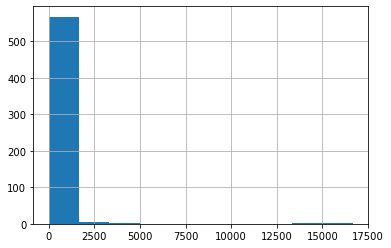

In [49]:
data['CPC2'].hist()

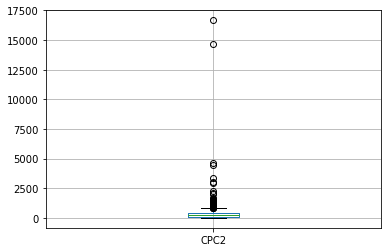

In [50]:
data.boxplot(column=['CPC2'])

In [51]:
data[data['CPC2']>12000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2
462,2021,10.02.2021,февраль,Асафьев Жизнь,Интеграция,GO,Кодинг,223 000,233 796,р.100 000,р.16 667,"0,00%",6,"133,33%",8.00000,"37,5%",3,4,р.12 500,138%,https://youtu.be/hpcRDhEZNag,hpcRDhEZNag,https://www.youtube.com/watch?v=hpcRDhEZNag,Асафьев. Жизнь,261000.00000,Faw угрожает Volkswagen | Проблемы Skoda Octav...,2021-02-09 22:25:25,2021.00000,February,Tuesday,243916.00000,38M3S,08m22,3.00000,Люди и блоги,1205.00000,14276.00000,535.00000,"['Асафьев', 'Стас', 'Автопрагмат', 'Автоподбор...",Освой профессию «Разработчик на Go» в SkillFac...,Асафьев,50,17.02.2021,"6,14%",223000.00000,233796.00000,100000.00000,16667.00000
543,2021,03.04.2021,апрель,SeniorSoftwareVlogger,Интеграция,FPW,Кодинг,86 000,17 859,р.44 000,р.14 667,"0,02%",3,"33,33%",1.00000,"0,0%",0,0,р.44 000,-100%,https://www.youtube.com/watch?v=jz0btfnwBZE,jz0btfnwBZE,https://www.youtube.com/watch?v=jz0btfnwBZE,Senior Software Vlogger,93100.00000,Три вида программистов. Сказка про стартапы,2021-04-05 19:15:21,2021.00000,April,Monday,19306.00000,7M42S,00m45,2.00000,Образование,148.00000,2485.00000,129.00000,NaN,Научись писать сайты и приложения на Python в ...,SENIOR,45,15.04.2021,"2,97%",86000.00000,17859.00000,44000.00000,14667.00000


In [52]:
# Действительно есть некоторые ресурсы с которых очень мало переходов

In [53]:
#data[data['Визиты_Факт']<3]

In [54]:
#Заменим пропуски на ноль
data['CPC2'].fillna(0,inplace=True)

'CTR2' -Конверсия просмотров в переход


In [55]:
data['CTR2'] = data['СTR']
data['CTR2'] = data['CTR2'].replace(',','.',regex=True)
data['CTR2'] = data['CTR2'].replace('%','',regex=True)
data['CTR2'] = data['CTR2'].replace('#REF!',np.nan,regex=True)
data['CTR2'] = data['CTR2'].replace('#DIV/0!',np.nan,regex=True)
data['CTR2'] = data['CTR2'].astype(np.float64)
data['CTR2'] = data['CTR2']*0.01

In [56]:
data['CTR2'].isna().sum()

12

In [57]:
#Заменим пропуски на ноль
data['CTR2'].fillna(0,inplace=True)

In [58]:
data['Визиты_Факт2'] = data['Визиты_Факт'].replace(r'\D+','',regex=True)
data['Визиты_Факт2'] = data['Визиты_Факт2'].astype(np.float64)

In [59]:
data['Визиты_Факт2'].describe()

count    575.00000
mean     573.67826
std      768.90846
min        3.00000
25%      154.50000
50%      335.00000
75%      627.50000
max     7000.00000
Name: Визиты_Факт2, dtype: float64

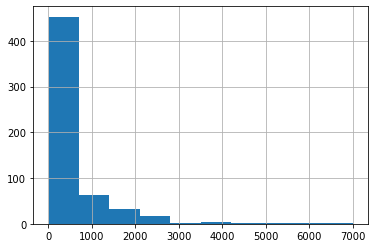

In [60]:
data['Визиты_Факт2'].hist()

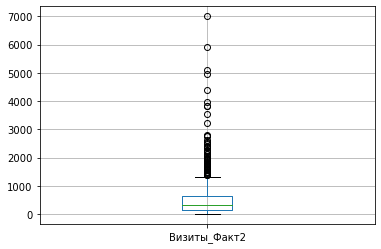

In [61]:
data.boxplot(column=['Визиты_Факт2'])

In [62]:
data['Визиты_Факт2'].fillna(0,inplace=True)

In [63]:
data['Визиты_Факт2'].isna().sum()

0

In [64]:
# Действительно есть ресурсы с которых очень мало визитов:
data['Название'][data['Визиты_Факт2']<6]
# На этих ресурсах лучше бы больше не размещать

58                  CG Speak
499            Касе Гасанов 
510      Мария Дробушевская 
514                    Geexy
520          Территория Дома
522                     Тори
543    SeniorSoftwareVlogger
549        Дизайн Интерьеров
550            АНя Консервы 
553          Ольга Качанова 
555        Ксения Вострикова
556          Анастасия Булла
558         Nellifornication
Name: Название, dtype: object

In [65]:
# Ресурсы с самым большим количеством визиттов
data[data['Визиты_Факт2']>5000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2
196,2020,25.08.2020,август,The Люди,Интеграция,DSPR,Data Science,2 230 000,10 000 000,р.860 000,р.146,"0,06%",5905,"3,61%",213.00000,"6,1%",13,8,р.4 038,53%,https://www.youtube.com/watch?v=enRlWWHEoiU&t=...,enRlWWHEoiU,https://www.youtube.com/watch?v=enRlWWHEoiU,The Люди,3480000.00000,Мексика / Горячие точки Нарковойны Мафии / Как...,2020-08-25 7:00:54,2020.00000,August,Tuesday,11308890.00000,1H22M5S,22m05,4.00000,Люди и блоги,25833.00000,336394.00000,10746.00000,"['мексика', 'мексиканец', 'наркобароны', 'карт...","Оформить кредитную карту ""100 дней без процент...",Лядов,45,31.08.2020,"10,72%",2230000.00000,1000000.00000,860000.00000,146.00000,0.00060,5905.00000
248,2020,22.09.2020,сентябрь,Усачев,Интеграция,MOTION MEDIA,Дизайн,2 390 000,1 290 000,р.350 000,р.50,"0,54%",7000,"1,79%",125.00000,"32,0%",40,9,р.2 800,801%,https://www.youtube.com/watch?v=AwqWnG2ZofY,AwqWnG2ZofY,https://www.youtube.com/watch?v=AwqWnG2ZofY,Руслан Усачев,2540000.00000,Тайна лекарства от COVID-19 // СБЕР – НЕ БАНК/...,2020-09-22 18:41:16,2020.00000,September,Tuesday,1301604.00000,21M52S,05m10,3.00000,Новости и политика,2973.00000,127607.00000,1999.00000,"['Руслан Усачев', 'usachevshow', 'Руслан', 'Ус...",🔥Профессия Моушн и Медиа - дизайнер \nв онлайн...,USACHEV,45,NaN,"5,22%",2390000.00000,1290000.00000,350000.00000,50.00000,0.00540,7000.00000
358,2020,25.11.2020,ноябрь,Руслан Усачев,Интеграция,MOTION,Дизайн,2 440 000,1 053 000,р.550 000,р.108,"0,48%",5 100,"1,53%",78.00000,"34,6%",27,8,р.7 051,233%,https://youtu.be/03a8X2B1D_k?t=228,03a8X2B1D_k,https://www.youtube.com/watch?v=03a8X2B1D_k,Руслан Усачев,2540000.00000,ЛЕДЯНОЙ ШТОРМ на Востоке России //ТАЙНАЯ ДОЧЬ ...,2020-11-25 16:07:55,2020.00000,November,Wednesday,1104440.00000,21M53S,03m48,3.00000,Новости и политика,3934.00000,116706.00000,1995.00000,"['Руслан Усачев', 'usachevshow', 'Руслан', 'Ус...",🔥 Черная пятница в Online-школе Contented: htt...,USACHEV,55,30.11.2020,"4,83%",2440000.00000,1053000.00000,550000.00000,108.00000,0.00480,5100.00000


'С1_Факт' это на самом деле отношение Заявки_Факт/Визиты_Факт

In [66]:
data['С1_Факт2'] = data['С1_Факт'].replace(',','.',regex=True)
data['С1_Факт2'] = data['С1_Факт2'].replace('%','',regex=True)
#data['CTR2'] = data['CTR2'].replace('#REF!',np.nan,regex=True)
data['С1_Факт2'] = data['С1_Факт2'].replace('#DIV/0!',np.nan,regex=True)
data['С1_Факт2'] = data['С1_Факт2'].astype(np.float64)
data['С1_Факт2'] = data['С1_Факт2']*0.01

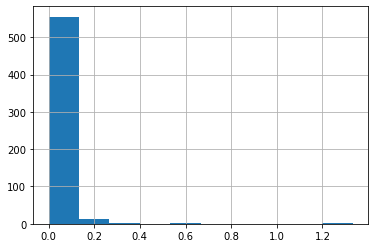

In [67]:
data['С1_Факт2'].hist()

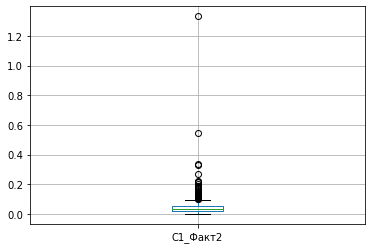

In [68]:
data.boxplot(column=['С1_Факт2'])

In [69]:
data[data['С1_Факт2']>1.2]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2
462,2021,10.02.2021,февраль,Асафьев Жизнь,Интеграция,GO,Кодинг,223 000,233 796,р.100 000,р.16 667,"0,00%",6,"133,33%",8.00000,"37,5%",3,4,р.12 500,138%,https://youtu.be/hpcRDhEZNag,hpcRDhEZNag,https://www.youtube.com/watch?v=hpcRDhEZNag,Асафьев. Жизнь,261000.00000,Faw угрожает Volkswagen | Проблемы Skoda Octav...,2021-02-09 22:25:25,2021.00000,February,Tuesday,243916.00000,38M3S,08m22,3.00000,Люди и блоги,1205.00000,14276.00000,535.00000,"['Асафьев', 'Стас', 'Автопрагмат', 'Автоподбор...",Освой профессию «Разработчик на Go» в SkillFac...,Асафьев,50,17.02.2021,"6,14%",223000.00000,233796.00000,100000.00000,16667.00000,0.00000,6.00000,1.33330


Непонятно, как заявок оказалось больше чем визитов заменим значение на 1, как максимально возможную


In [70]:
data['С1_Факт2'] = data['С1_Факт2'].replace(1.3333,1)

In [71]:
data['С1_Факт2'].isna().sum()

13

In [72]:
data['С1_Факт2'].fillna(0,inplace=True)

In [73]:
data['Заявки_Факт2'] = data['Заявки_Факт']

In [74]:
data['Заявки_Факт2'].describe()

count   569.00000
mean     26.16696
std      53.08651
min       0.00000
25%       5.00000
50%      11.00000
75%      26.00000
max     700.00000
Name: Заявки_Факт2, dtype: float64

In [75]:
data['Заявки_Факт2'].fillna(0
                            ,inplace=True)

'С2_Факт' - Конверсия заявки в продажу  это отношение  = Оплаты_факт/Заявки_факт

In [76]:
data['С2_Факт2'] = data['С2_Факт'].replace(',','.',regex=True)
data['С2_Факт2'] = data['С2_Факт2'].replace('%','',regex=True)
data['С2_Факт2'] = data['С2_Факт2'].replace('#VALUE!',np.nan,regex=True)
data['С2_Факт2'] = data['С2_Факт2'].replace('#DIV/0!',np.nan,regex=True)
data['С2_Факт2'] = data['С2_Факт2'].astype(np.float64)
data['С2_Факт2'] = data['С2_Факт2']*0.01

In [77]:
data['С2_Факт2'].describe()

count   541.00000
mean      0.13364
std       0.37271
min       0.00000
25%       0.00000
50%       0.07400
75%       0.18200
max       8.00000
Name: С2_Факт2, dtype: float64

In [78]:
data['С2_Факт2'].isna().sum()

46

In [79]:
data['С2_Факт2'].fillna(0,inplace=True)

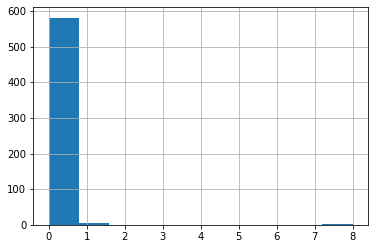

In [80]:
data['С2_Факт2'].hist()

In [81]:
data[data['С2_Факт2']>1]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2
47,2020,22.05.2020,май,PRO роботов,Интеграция,DSPR,Data Science,38 000,6 900,р.7 500,р.156,"0,70%",48,"2,08%",1.00000,"800,0%",8,0,р.7 500,-100%,https://www.youtube.com/watch?v=b1xRVq7NDTY&fe...,b1xRVq7NDTY,https://www.youtube.com/watch?v=b1xRVq7NDTY,PRO роботов,136000.00000,ТОП 5 изобретателей 2020 и их невероятные изоб...,2020-05-22 11:59:55,2020.00000,May,Friday,32504.00000,7M50S,03m05,5.00000,Наука и технологии,101.00000,1457.00000,44.00000,"['невероятные изобретения', 'невероятные изобр...",«Профессия Data Scientist» в SkillFactory: htt...,PRO роботов,35,30.05.2020,"1,18%",38000.00000,6900.00000,7500.00000,156.00000,0.00700,48.00000,0.02080,1.00000,8.00000


In [82]:
data['Оплаты_Факт']

0       0
1       0
2       3
3       6
4       2
       ..
582     0
583     0
584    10
585     5
586     6
Name: Оплаты_Факт, Length: 587, dtype: object

In [83]:
data['Оплаты_Факт2'] = data['Оплаты_Факт'].replace('-',np.nan,regex=True)
data['Оплаты_Факт2'] = data['Оплаты_Факт2'].astype(np.float64)

In [84]:
data['Оплаты_Факт2'].isna().sum()

16

In [85]:
data['Оплаты_Факт2'].describe()

count   571.00000
mean      2.46935
std       4.03324
min       0.00000
25%       0.00000
50%       1.00000
75%       3.00000
max      40.00000
Name: Оплаты_Факт2, dtype: float64

In [86]:
data['Оплаты_Факт2'].fillna(0,inplace=True)

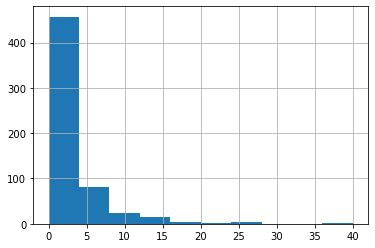

In [87]:
data['Оплаты_Факт2'].hist()

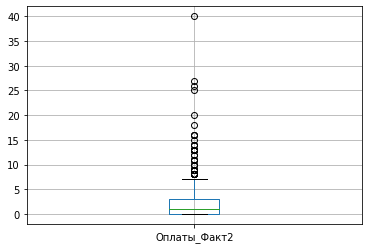

In [88]:
data.boxplot(column=['Оплаты_Факт2'])

In [89]:
data[data['Оплаты_Факт2']>30]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2
248,2020,22.09.2020,сентябрь,Усачев,Интеграция,MOTION MEDIA,Дизайн,2 390 000,1 290 000,р.350 000,р.50,"0,54%",7000,"1,79%",125.00000,"32,0%",40,9,р.2 800,801%,https://www.youtube.com/watch?v=AwqWnG2ZofY,AwqWnG2ZofY,https://www.youtube.com/watch?v=AwqWnG2ZofY,Руслан Усачев,2540000.00000,Тайна лекарства от COVID-19 // СБЕР – НЕ БАНК/...,2020-09-22 18:41:16,2020.00000,September,Tuesday,1301604.00000,21M52S,05m10,3.00000,Новости и политика,2973.00000,127607.00000,1999.00000,"['Руслан Усачев', 'usachevshow', 'Руслан', 'Ус...",🔥Профессия Моушн и Медиа - дизайнер \nв онлайн...,USACHEV,45,NaN,"5,22%",2390000.00000,1290000.00000,350000.00000,50.00000,0.00540,7000.00000,0.01790,125.00000,0.32000,40.00000


Не выбросы, так как остальные столбцы подтверждают верные значения ROMI = 801%

In [90]:
data['Доход2'] = data['Доход']

In [91]:
data['Доход2'].describe()

count   587.00000
mean      2.14821
std       2.33028
min       0.00000
25%       0.00000
50%       2.00000
75%       3.00000
max       9.00000
Name: Доход2, dtype: float64

In [92]:
data['Доход2'].value_counts()

0    242
3     90
2     82
4     56
7     33
1     28
5     26
8     14
6     14
9      2
Name: Доход2, dtype: int64

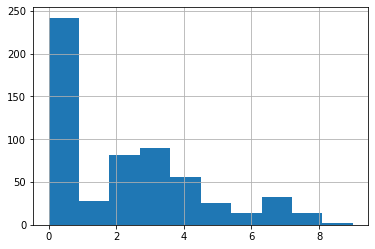

In [93]:
data['Доход2'].hist()

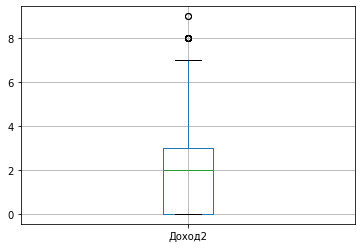

In [94]:
data.boxplot(column=['Доход2'])

In [95]:
data['CPL2'] = data['CPL'].replace(r'\D+','',regex=True)
data['CPL2'] = data['CPL2'].astype(np.float64)

In [96]:
data['CPL2'].isna().sum()

41

In [97]:
data['CPL2'].fillna(0,inplace=True)

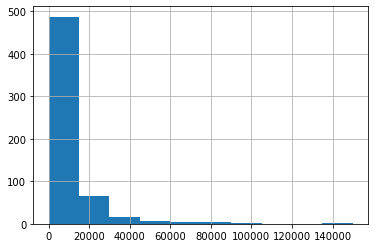

In [98]:
data['CPL2'].hist()

In [99]:
data['CPL2'].describe()

count      587.00000
mean      9329.38160
std      14452.44030
min          0.00000
25%       1452.50000
50%       5000.00000
75%      11526.50000
max     150000.00000
Name: CPL2, dtype: float64

Наша целевая переменная ROMI

In [100]:
data['ROMI2'] = data['ROMI'].replace('#DIV/0!',np.nan,regex=True)
data['ROMI2'] = data['ROMI2'].replace('%','',regex=True)
data['ROMI2'] = data['ROMI2'].astype(np.float64)
data['ROMI2'] = data['ROMI2']*0.01


In [101]:
data['ROMI2'].describe()

count    510.00000
mean      20.90220
std      442.72411
min       -1.00000
25%       -1.00000
50%        0.00500
75%        1.75500
max     9999.00000
Name: ROMI2, dtype: float64

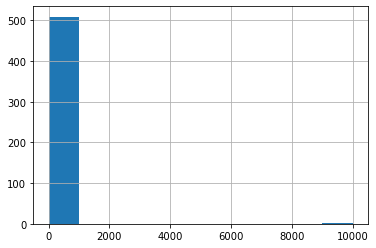

In [102]:
data['ROMI2'].hist()

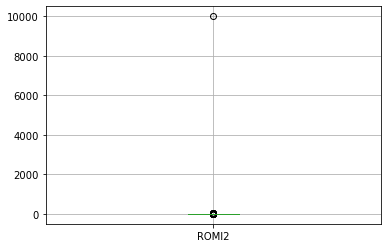

In [103]:
data.boxplot(column=['ROMI2'])

In [104]:
data[data['ROMI2']>8000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2
372,2020,01.12.2020,декабрь,Хауди Хо,Интеграция,ADMIN,Кодинг,1 270 000,69 700,р.6,р.0,"0,28%",197,"7,11%",14.00000,"7,1%",1,2,р.0,999900%,https://www.youtube.com/watch?v=lEAjwY5TAsE,lEAjwY5TAsE,https://www.youtube.com/watch?v=lEAjwY5TAsE,Хауди Хо™ - Просто о мире IT!,1560000.00000,⚡ УСКОРЯЕМ PYTHON в 20 РАЗ! | Новый способ :3,2020-12-01 17:52:30,2020.00000,December,Tuesday,93113.00000,10M36S,02m34,3.00000,Наука и технологии,1282.00000,8241.00000,257.00000,"['python', 'пайтон', 'уроки для новичков', 'ус...",Рабочий способ как ускорить любой Python код в...,Хауди Хо,50,10.12.2020,"0,63%",1270000.00000,69700.00000,6.00000,0.00000,0.00280,197.00000,0.07110,14.00000,0.07100,1.00000,2,0.00000,9999.00000


In [105]:
#372 явный выброс и ошибка заполнения не знаю чем заменить, наверное стоит удалить эту строку
data = data.drop(372)

In [106]:
data['ROMI2'].isna().sum()

77

Запомним , что у нас есть пустые значения в целевой переменной, но не будем их заполнять, позже удалим.

In [107]:
data.head()

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2
0,2019,15.01.2020,январь,Flatingo,Интеграция,GD,Кодинг,52 027,42 225,р.4 500,р.15,"0,72%",304,"11,2%",34.00000,"0,0%",0,0,р.132,-100%,https://www.youtube.com/watch?v=aqSjawK_QwA,aqSjawK_QwA,https://www.youtube.com/watch?v=aqSjawK_QwA,Flatingo. Разработчик игр,270000.00000,Как разработчики делят игры / Создание игр и и...,2019-01-14 4:23:02,2019.00000,January,Monday,107619.00000,3M46S,00m02,1.00000,Игры,405.00000,3548.00000,320.00000,"['флатинго', 'flatingo', 'Новичков андрей', 'р...",# Игровые ассеты 2D и 3D - https://craftpix.pa...,NaN,NaN,NaN,"1,58%",52027.00000,42225.00000,4500.00000,15.00000,0.00720,304.00000,0.11200,34.00000,0.00000,0.00000,0,132.00000,-1.00000
1,2020,15.01.2020,январь,Johe News,Интеграция,PWS,Кодинг,9 000,6 389,р.5 000,р.40,"1,94%",124,"4,0%",5.00000,"0,0%",0,0,р.1 000,-100%,https://www.youtube.com/watch?v=o7h1-6U1u1g&t=...,o7h1-6U1u1g,https://www.youtube.com/watch?v=o7h1-6U1u1g,Johe News,14600.00000,Raspberry Pi лучшие проекты,2020-01-17 11:58:16,2020.00000,January,Friday,62889.00000,31M41S,02m42,2.00000,Наука и технологии,366.00000,1955.00000,700.00000,"['программирование', 'tech', 'webdev', 'progra...","Если захотите купить крипту, моя рефералка на ...",NaN,NaN,NaN,"20,69%",9000.00000,6389.00000,5000.00000,40.00000,0.01940,124.00000,0.04000,5.00000,0.00000,0.00000,0,1000.00000,-1.00000
2,2020,15.01.2020,январь,PRO роботов,Интеграция,DST,Data Science,38 000,6 900,р.7 500,р.46,"2,38%",164,"7,9%",13.00000,"23,1%",3,4,р.577,3380%,https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...,mk8OsCBZ-yw,https://www.youtube.com/watch?v=mk8OsCBZ-yw,PRO роботов,136000.00000,"20+ Самых Невероятных Изобретений, Которые Изм...",2020-01-23 13:33:38,2020.00000,January,Thursday,112566.00000,10M14S,04m13,5.00000,Наука и технологии,493.00000,2866.00000,210.00000,"['технология', 'новые технологии', 'современны...","20+ Самых Невероятных Изобретений, Которые Изм...",PRO Роботов,25,15.02.2020,"2,62%",38000.00000,6900.00000,7500.00000,46.00000,0.02380,164.00000,0.07900,13.00000,0.23100,3.00000,4,577.00000,33.80000
3,2020,15.01.2020,январь,Хауди Хо,Интеграция,PWS,Кодинг,842 000,50 000,р.25 000,р.15,"3,39%",1697,"6,5%",111.00000,"5,4%",6,4,р.225,1044%,https://youtu.be/M8fhrtvedHA,M8fhrtvedHA,https://www.youtube.com/watch?v=M8fhrtvedHA,Хауди Хо™ - Просто о мире IT!,1560000.00000,Пишем TELEGRAM бота на Python,2020-01-24 18:33:25,2020.00000,January,Friday,560514.00000,12M58S,06m52,6.00000,Наука и технологии,2404.00000,22013.00000,668.00000,"['python', 'бот', 'telegram', 'телеграм', 'как...",Урок как создать Telegram бота с нуля.\nНа язы...,NaN,40,31.01.2020,"1,61%",842000.00000,50000.00000,25000.00000,15.00000,0.03390,1697.00000,0.06500,111.00000,0.05400,6.00000,4,225.00000,10.44000
4,2020,15.01.2020,январь,Foo52ru,Интеграция,DST,Data Science,35 000,22 000,р.25 000,р.60,"1,90%",418,"4,3%",18.00000,"11,1%",2,3,р.1 389,620%,https://www.youtube.com/watch?v=J9ZgrTAFw60,J9ZgrTAFw60,https://www.youtube.com/watch?v=J9ZgrTAFw60,foo52ru ТехноШаман,62100.00000,Нейронная сеть. Часть 6. Прикручиваю нейросеть...,2020-01-24 4:44:31,2020.00000,January,Friday,59620.00000,9M23S,00m43,2.00000,Наука и технологии,264.00000,4422.00000,68.00000,"['нейросеть', 'нейронные сети', 'pixilang']",Специализация Data Science в SkillFactory: htt...,foo52ru,25,15.02.2020,"7,66%",35000.00000,22000.00000,25000.00000,60.00000,0.01900,418.00000,0.04300,18.00000,0.11100,2.00000,3,1389.00000,6.20000


In [108]:
data['channel_subscribers'].describe()

count       568.00000
mean     809101.60387
std     1034419.79553
min          15.00000
25%      228500.00000
50%      528000.00000
75%     1000000.00000
max     9860000.00000
Name: channel_subscribers, dtype: float64

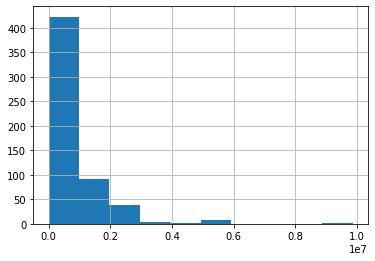

In [109]:
data['channel_subscribers'].hist()

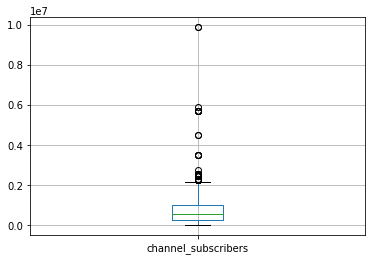

In [110]:
data.boxplot(column=['channel_subscribers'])

In [111]:
data[data['channel_subscribers']>8000000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2
117,2020,03.07.2020,июль,wylsa.com,Интеграция,PWS,Кодинг,9 300 000,268 000,р.250 000,р.207,"0,45%",1206,"3,65%",44.00000,"6,8%",3,4,р.5 682,-8%,https://www.youtube.com/watch?v=l2pcUBxugcY&fe...,l2pcUBxugcY,https://www.youtube.com/watch?v=l2pcUBxugcY,Wylsacom,9860000.00000,iPhone с Авито - как купить без обмана?,2020-07-25 16:36:55,2020.00000,July,Saturday,309745.00000,12M55S,01m54,2.00000,Наука и технологии,15398.00000,23993.00000,2619.00000,"['iPhone', 'Apple', 'wylsa', 'Wylsacom', 'авит...",Курс «Python для веб-разработки» в SkillFactor...,WYLSA,50,10.08.2020,"0,43%",9300000.00000,268000.00000,250000.00000,207.00000,0.00450,1206.00000,0.03650,44.00000,0.06800,3.00000,4,5682.00000,-0.08000
178,2020,15.08.2020,август,Wylsa,Интеграция,DSPR,Data Science,1 410 000,452 778,р.250 000,р.427,"0,13%",585,"4,44%",26.00000,"0,0%",0,0,р.9 615,NaN,https://www.youtube.com/watch?v=q8ojg-NqACE&t=60s,q8ojg-NqACE,https://www.youtube.com/watch?v=q8ojg-NqACE,Wylsacom,9860000.00000,Apple iBook G3 - первый в мире ноутбук с беспр...,2020-08-14 18:12:44,2020.00000,August,Friday,484904.00000,13M19S,01m00,2.00000,Наука и технологии,1298.00000,23191.00000,3367.00000,"['iPhone', 'Apple', 'wylsa', 'Wylsacom', 'iboo...",Профессия Data Scientist в Скилфэктори\n50% ск...,Wylsa,50,01.09.2020,"0,28%",1410000.00000,452778.00000,250000.00000,427.00000,0.00130,585.00000,0.04440,26.00000,0.00000,0.00000,0,9615.00000,nan


Действительно если проверить на ютубе 9.8 млн подписчиков

In [112]:
data['channel_subscribers'].isna().sum()

18

In [113]:
data['channel_subscribers'].fillna(0,inplace=True)

In [114]:
data['views'].describe()

count        569.00000
mean      351946.39367
std       674757.83277
min            6.00000
25%        80968.00000
50%       196729.00000
75%       375979.00000
max     11308890.00000
Name: views, dtype: float64

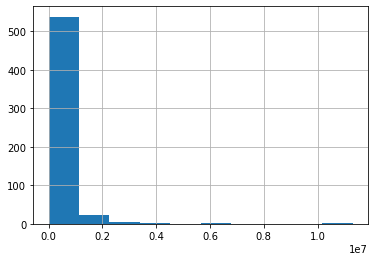

In [115]:
data['views'].hist()

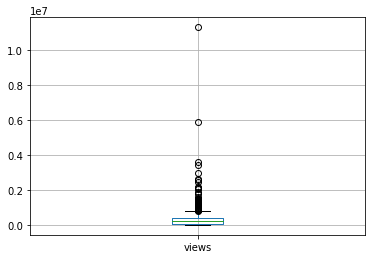

In [116]:
data.boxplot(column=['views'])

In [117]:
data[data['views']>10000000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2
196,2020,25.08.2020,август,The Люди,Интеграция,DSPR,Data Science,2 230 000,10 000 000,р.860 000,р.146,"0,06%",5905,"3,61%",213.00000,"6,1%",13,8,р.4 038,53%,https://www.youtube.com/watch?v=enRlWWHEoiU&t=...,enRlWWHEoiU,https://www.youtube.com/watch?v=enRlWWHEoiU,The Люди,3480000.00000,Мексика / Горячие точки Нарковойны Мафии / Как...,2020-08-25 7:00:54,2020.00000,August,Tuesday,11308890.00000,1H22M5S,22m05,4.00000,Люди и блоги,25833.00000,336394.00000,10746.00000,"['мексика', 'мексиканец', 'наркобароны', 'карт...","Оформить кредитную карту ""100 дней без процент...",Лядов,45,31.08.2020,"10,72%",2230000.00000,1000000.00000,860000.00000,146.00000,0.00060,5905.00000,0.03610,213.00000,0.06100,13.00000,8,4038.00000,0.53000


In [118]:
# Действительно на канале более 11 млн просмотров

In [119]:
data['views'].isna().sum()

17

In [120]:
data['views'].fillna(0,inplace=True)

In [121]:
#'video_duration' - не хватило времени обработать

In [122]:
data['time_of_advertisement3'] = data['time_of_advertisement'].str.split('m').str[0]
data['time_of_advertisement4'] = data['time_of_advertisement'].str.split('m').str[1]
data[["time_of_advertisement3", "time_of_advertisement4"]] = data[["time_of_advertisement3", "time_of_advertisement4"]].apply(pd.to_numeric)
data['time_of_advertisement5'] = data['time_of_advertisement3']*60+data['time_of_advertisement4']

In [123]:
data['time_of_advertisement5'].describe()

count    568.00000
mean     278.88556
std      348.40377
min        1.00000
25%       70.75000
50%      186.50000
75%      347.75000
max     2683.00000
Name: time_of_advertisement5, dtype: float64

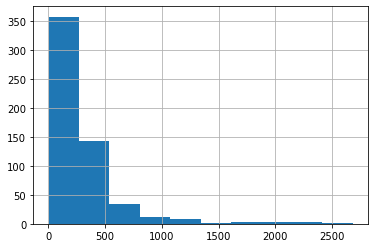

In [124]:
data['time_of_advertisement5'].hist()

In [125]:
data[data['time_of_advertisement5']==2683]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2,time_of_advertisement3,time_of_advertisement4,time_of_advertisement5
585,2021,29.04.2021,апрель,Екатерина шульман,Интеграция,DST,Data science,455000,210000,р.140 000,р.411,"0,16%",341,"4,69%",16.00000,"31,3%",5,5,р.8 750,176%,https://youtu.be/xfn5jg0_8Q0?t=2521,xfn5jg0_8Q0,https://www.youtube.com/watch?v=xfn5jg0_8Q0,Екатерина Шульман,459000.00000,"Ты был не царь, а лицедей. (Премьера фильма). ...",2021-04-29 8:51:05,2021.00000,April,Thursday,238759.00000,53M33S,44m43,9.00000,Образование,1821.00000,19222.00000,356.00000,"['Николай I', 'Россия', 'история России', 'дек...",Покупайте квартиры на Avito:\n\nhttps://clc.to...,ШУЛЬМАН,55,NaN,"4,66%",455000.00000,210000.00000,140000.00000,411.00000,0.00160,341.00000,0.04690,16.00000,0.31300,5.00000,5,8750.00000,1.76000,44.00000,43.00000,2683.00000


In [126]:
data['time_of_advertisement5'].isna().sum()

18

In [127]:
data['time_of_advertisement5'].fillna(0,inplace=True)

In [128]:
data['comments'].describe()

count     569.00000
mean     1912.79965
std      3507.18633
min         0.00000
25%       456.00000
50%      1020.00000
75%      1871.00000
max     32302.00000
Name: comments, dtype: float64

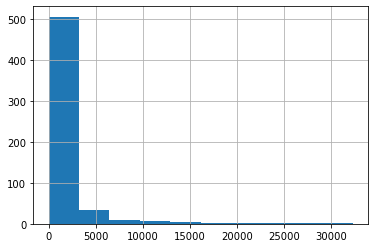

In [129]:
data['comments'].hist()

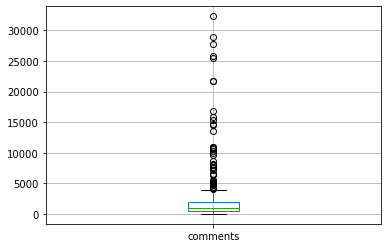

In [130]:
data.boxplot(column=['comments'])

In [131]:
data[data['comments']>30000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2,time_of_advertisement3,time_of_advertisement4,time_of_advertisement5
586,2021,30.04.2021,апрель,The Люди,Интеграция,FPW,Кодинг,3 310 000,3400000,р.800 000,р.330,"0,07%",2 423,"22,37%",542.00000,"1,1%",6,5,р.1 476,-58%,https://www.youtube.com/watch?v=JJblj5OX9fA&t=...,JJblj5OX9fA,https://www.youtube.com/watch?v=JJblj5OX9fA,The Люди,3480000.00000,Самый Брошенный город / Воркута / Как живут в ...,2021-04-30 8:20:09,2021.00000,April,Friday,3581039.00000,46M28S,04m05,2.00000,Люди и блоги,32302.00000,180605.00000,5243.00000,"['the люди', 'люди', 'как живут люди', 'интерв...",‎️‍🔥 Получи 90 тыс на обучение профессии Fulls...,NaN,NaN,NaN,"6,27%",3310000.00000,3400000.00000,800000.00000,330.00000,0.00070,2423.00000,0.22370,542.00000,0.01100,6.00000,5,1476.00000,-0.58000,4.00000,5.00000,245.00000


In [132]:
# Да проверка показала, что есть такое количество комментариев у видео

In [133]:
data['comments'].isna().sum()

17

In [134]:
data['comments'].fillna(0,inplace=True)

In [135]:
#'channel_subscribers','video_year','views','video_duration','time_of_advertisement',
#           'part_of_video_with_ad_from1_to_10','comments','likes','dislikes',
 #          'discount_percentage','ER']

In [136]:
data['likes'].describe()

count      569.00000
mean     21511.30931
std      29396.00933
min          0.00000
25%       5774.00000
50%      13972.00000
75%      25295.00000
max     336394.00000
Name: likes, dtype: float64

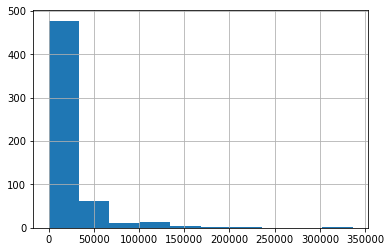

In [137]:
data['likes'].hist()

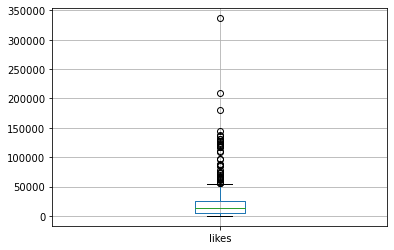

In [138]:
data.boxplot(column=['likes'])

In [139]:
data[data['likes']>300000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2,time_of_advertisement3,time_of_advertisement4,time_of_advertisement5
196,2020,25.08.2020,август,The Люди,Интеграция,DSPR,Data Science,2 230 000,10 000 000,р.860 000,р.146,"0,06%",5905,"3,61%",213.00000,"6,1%",13,8,р.4 038,53%,https://www.youtube.com/watch?v=enRlWWHEoiU&t=...,enRlWWHEoiU,https://www.youtube.com/watch?v=enRlWWHEoiU,The Люди,3480000.00000,Мексика / Горячие точки Нарковойны Мафии / Как...,2020-08-25 7:00:54,2020.00000,August,Tuesday,11308890.00000,1H22M5S,22m05,4.00000,Люди и блоги,25833.00000,336394.00000,10746.00000,"['мексика', 'мексиканец', 'наркобароны', 'карт...","Оформить кредитную карту ""100 дней без процент...",Лядов,45,31.08.2020,"10,72%",2230000.00000,1000000.00000,860000.00000,146.00000,0.00060,5905.00000,0.03610,213.00000,0.06100,13.00000,8,4038.00000,0.53000,22.00000,5.00000,1325.00000


In [140]:
# 196 Действительно на ютубе сегодня около 335 тыс лайков этого видео

In [141]:
data['likes'].isna().sum()

17

In [142]:
data['likes'].fillna(0,inplace=True)

In [143]:
data['dislikes'].describe()

count     569.00000
mean      737.75044
std      1349.30168
min         0.00000
25%       142.00000
50%       354.00000
75%       678.00000
max     12632.00000
Name: dislikes, dtype: float64

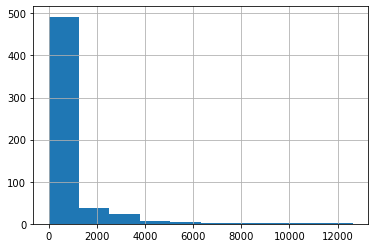

In [144]:
data['dislikes'].hist()

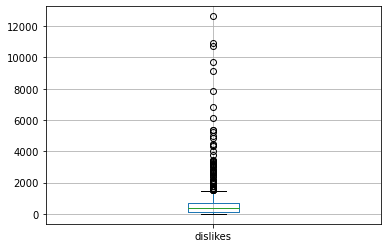

In [145]:
data.boxplot(column=['dislikes'])

In [146]:
data[data['dislikes']>12000]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2,time_of_advertisement3,time_of_advertisement4,time_of_advertisement5
302,2020,22.10.2020,октябрь,А поговорить,Интеграция,DSPR,Data Science,1 370 000,2 500 000,р.700 000,р.176,"0,16%",3981,"4,22%",168.00000,"7,7%",13,8,р.4 167,103%,https://www.youtube.com/watch?v=xYMvz4uVLlc&fe...,xYMvz4uVLlc,https://www.youtube.com/watch?v=xYMvz4uVLlc,А поговорить?,1730000.00000,"Светлана Тихановская: разговор в ЦИКе, жизнь в...",2020-10-22 8:04:05,2020.00000,October,Thursday,2631003.00000,1H24M17S,09m17,2.00000,Люди и блоги,27735.00000,131384.00000,12632.00000,"['а поговорить', 'эксклюзив', 'интервью', 'ших...",Профессия Data Scientist в SkillFactory: https...,А поговорить,45,30.11.2020,"9,93%",1370000.00000,2500000.00000,700000.00000,176.00000,0.00160,3981.00000,0.04220,168.00000,0.07700,13.00000,8,4167.00000,1.03000,9.00000,17.00000,557.00000


In [147]:
# 302 Действительно на ютубе сегодня около 13 тыс дизлайков этого видео

In [148]:
data['dislikes'].isna().sum()

17

In [149]:
data['dislikes'].fillna(0,inplace=True)

In [150]:
# Заметим, что в столбце есть одно выбивающееся значение 5000rub, заменим его на 5% (похоже на то)
data['discount_percentage'].value_counts()

45          216
50          162
55           84
35           23
60            8
40            8
10            5
25            5
15            3
20            2
5000 rub      2
Name: discount_percentage, dtype: int64

In [151]:
data['discount_percentage']  = data['discount_percentage'].replace('5000 rub','5',regex=True)

In [152]:
data['discount_percentage'] = data['discount_percentage'].astype(np.float64)

In [153]:
data['discount_percentage'].describe()

count   518.00000
mean     46.94015
std       7.62709
min       5.00000
25%      45.00000
50%      45.00000
75%      50.00000
max      60.00000
Name: discount_percentage, dtype: float64

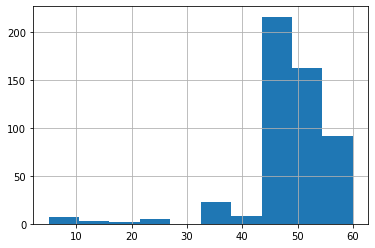

In [154]:
data['discount_percentage'].hist()

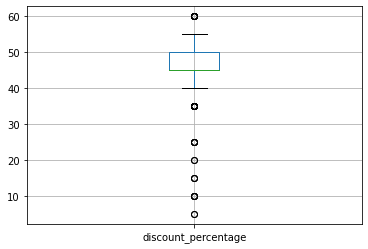

In [155]:
data.boxplot(column=['discount_percentage'])

In [156]:
data['discount_percentage'].isna().sum()

68

In [157]:
data['discount_percentage'].fillna(0,inplace=True)

In [158]:
data['ER'].value_counts()

0,94%     7
0,92%     5
1,17%     5
0,64%     4
1,04%     4
         ..
15,37%    1
5,17%     1
5,28%     1
6,02%     1
0,46%     1
Name: ER, Length: 408, dtype: int64

In [159]:
# Приведем столбец ER к числовому виду:
data['ER'] = data['ER'].replace(',','.',regex=True)
data['ER'] = data['ER'].replace('%','',regex=True)
data['ER'] = data['ER'].replace('#DIV/0!','0',regex=True)
data['ER'] = data['ER'].astype(np.float64)
data['ER'] = data['ER']*0.01

In [160]:
data['ER'].describe()

count   569.00000
mean      0.04372
std       0.04895
min       0.00000
25%       0.01450
50%       0.02920
75%       0.05580
max       0.61500
Name: ER, dtype: float64

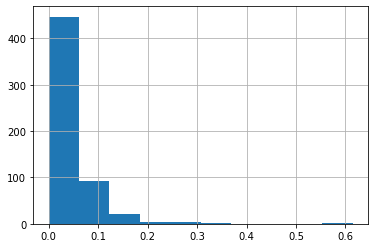

In [161]:
data['ER'].hist()

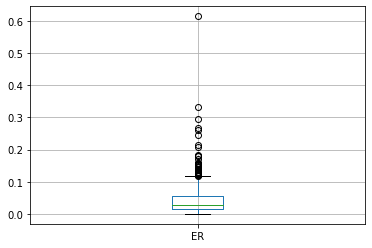

In [162]:
data.boxplot(column=['ER'])

In [163]:
data[data['ER']>0.6]

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2,time_of_advertisement3,time_of_advertisement4,time_of_advertisement5
573,2021,22.04.2021,апрель,После_Zavtra,Интеграция,HACKER,Кодинг,21000,217013,р.150 000,р.586,"0,12%",256,"5,08%",13.00000,"7,7%",1,2,р.11 538,-51%,https://www.youtube.com/watch?v=KAGwqu4yLWI#t=...,KAGwqu4yLWI,https://www.youtube.com/watch?v=KAGwqu4yLWI,После_Zавтра,21800.00000,Еда будущего. Интересные факты про технологии ...,2021-04-22 13:02:59,2021.00000,April,Thursday,245415.00000,17M1S,00m50,1.00000,Развлечения,1099.00000,11784.00000,525.00000,"['greenwise', 'ifarm', 'twins garden', 'будуще...",Научись этичному хакингу в SkillFactory: https...,ZAVTRA,45.00000,30.04.2021,0.61500,21000.00000,217013.00000,150000.00000,586.00000,0.00120,256.00000,0.05080,13.00000,0.07700,1.00000,2,11538.00000,-0.51000,0.00000,50.00000,50.00000


In [164]:
data['ER'].isna().sum()

17

In [165]:
data['ER'].fillna(0,inplace=True)

In [166]:
data['discount_percentage'].fillna(0,inplace=True)

In [167]:
num_cols = ['Подписчики2','Охват_Факт2','Расход2','CPC2','CTR2','Визиты_Факт2','С1_Факт2',
'Заявки_Факт2','С2_Факт2','Оплаты_Факт2','Доход2','CPL2','ROMI2','channel_subscribers',
'views','time_of_advertisement5','comments','likes','dislikes','discount_percentage',
'ER']

In [168]:
data[num_cols].head()

,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2,channel_subscribers,views,time_of_advertisement5,comments,likes,dislikes,discount_percentage,ER
0,52027.00000,42225.00000,4500.00000,15.00000,0.00720,304.00000,0.11200,34.00000,0.00000,0.00000,0,132.00000,-1.00000,270000.00000,107619.00000,2.00000,405.00000,3548.00000,320.00000,0.00000,0.01580
1,9000.00000,6389.00000,5000.00000,40.00000,0.01940,124.00000,0.04000,5.00000,0.00000,0.00000,0,1000.00000,-1.00000,14600.00000,62889.00000,162.00000,366.00000,1955.00000,700.00000,0.00000,0.20690
2,38000.00000,6900.00000,7500.00000,46.00000,0.02380,164.00000,0.07900,13.00000,0.23100,3.00000,4,577.00000,33.80000,136000.00000,112566.00000,253.00000,493.00000,2866.00000,210.00000,25.00000,0.02620
3,842000.00000,50000.00000,25000.00000,15.00000,0.03390,1697.00000,0.06500,111.00000,0.05400,6.00000,4,225.00000,10.44000,1560000.00000,560514.00000,412.00000,2404.00000,22013.00000,668.00000,40.00000,0.01610
4,35000.00000,22000.00000,25000.00000,60.00000,0.01900,418.00000,0.04300,18.00000,0.11100,2.00000,3,1389.00000,6.20000,62100.00000,59620.00000,43.00000,264.00000,4422.00000,68.00000,25.00000,0.07660


In [169]:
data[num_cols].isna().sum()

Подписчики2                0
Охват_Факт2                0
Расход2                    0
CPC2                       0
CTR2                       0
Визиты_Факт2               0
С1_Факт2                   0
Заявки_Факт2               0
С2_Факт2                   0
Оплаты_Факт2               0
Доход2                     0
CPL2                       0
ROMI2                     77
channel_subscribers        0
views                      0
time_of_advertisement5     0
comments                   0
likes                      0
dislikes                   0
discount_percentage        0
ER                         0
dtype: int64

In [170]:
data = data.dropna(axis='index', how='any', subset=['ROMI2'])

In [171]:
len(num_cols)

21

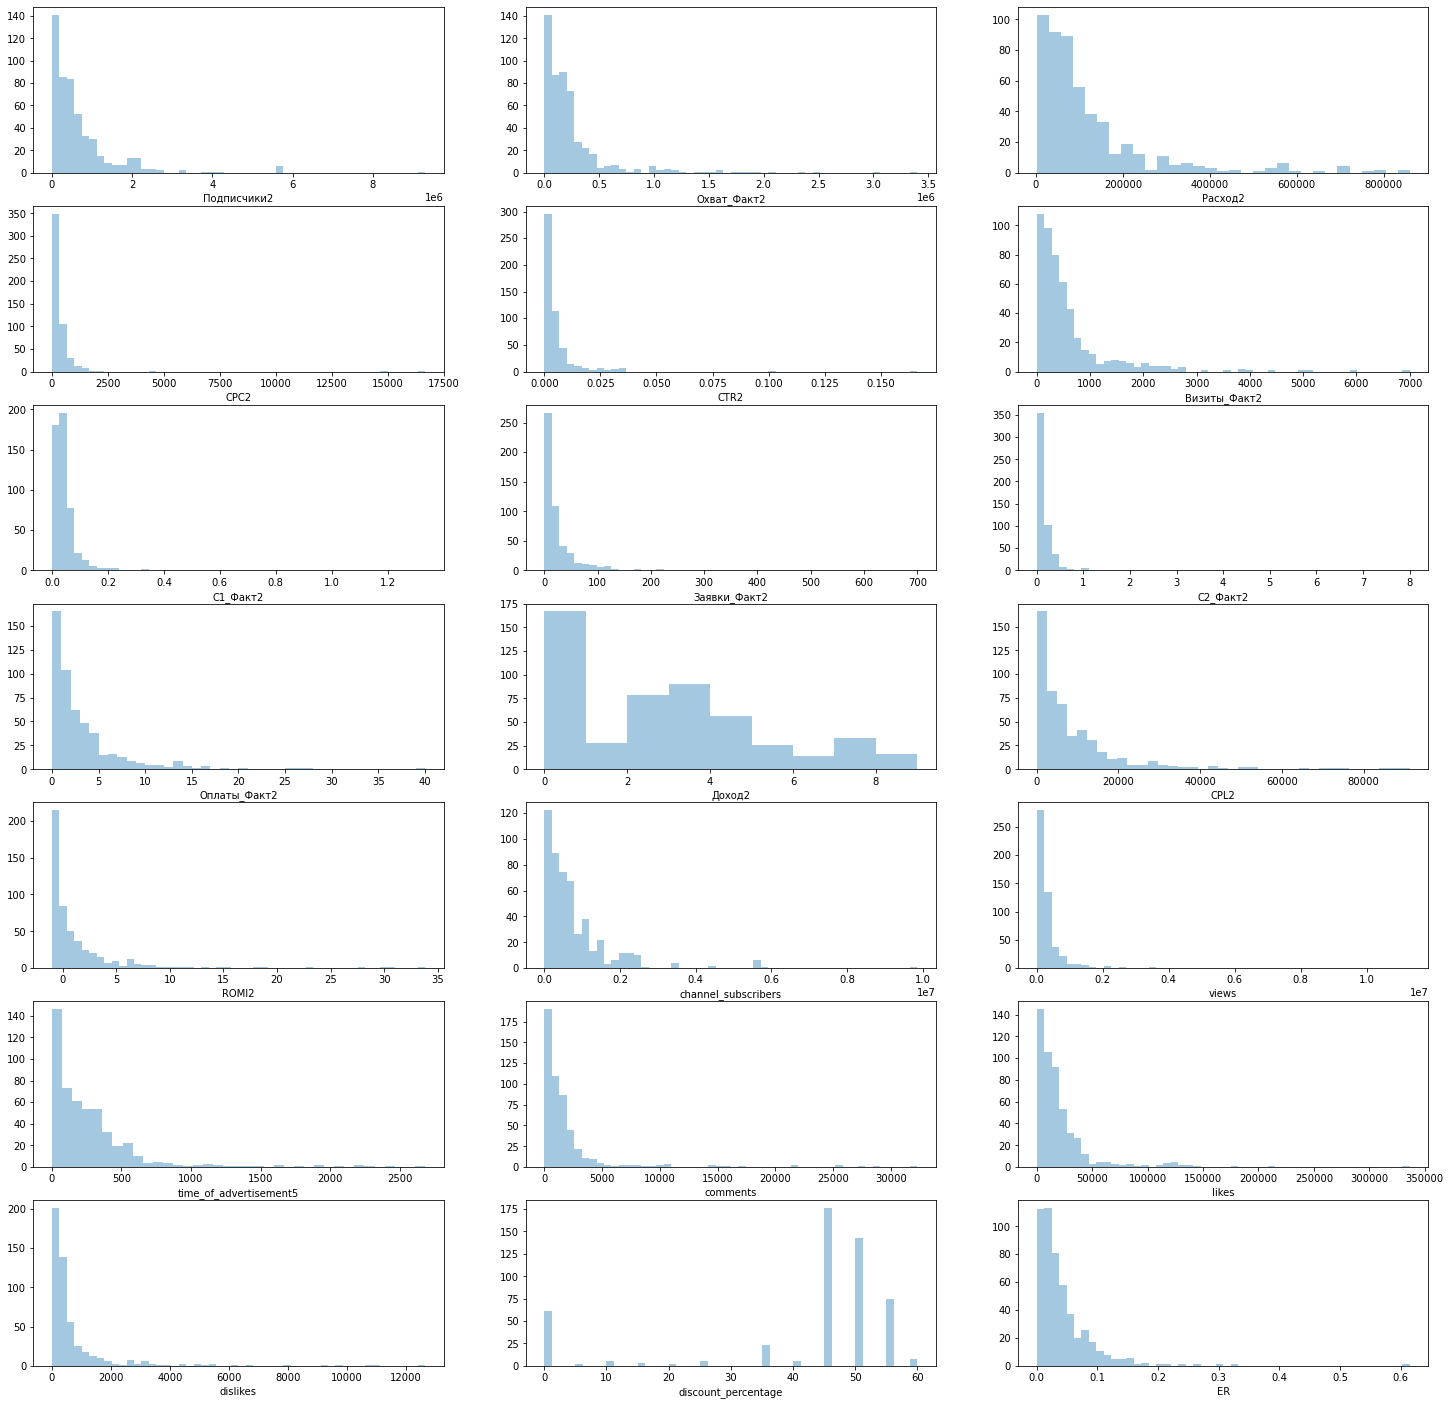

In [172]:
fig, axes = plt.subplots(7,3, figsize=(25,25))

for i,col in enumerate(num_cols):
    sns.distplot(data[col], kde=False, ax=axes.flat[i])

По числовым переменным. Распределения не нормальные с сильным смещением и большим правым хвостом.

Посмотрим на некоторые зависимости между переменными:

Зависимость нашей целевой переменной от месяца:

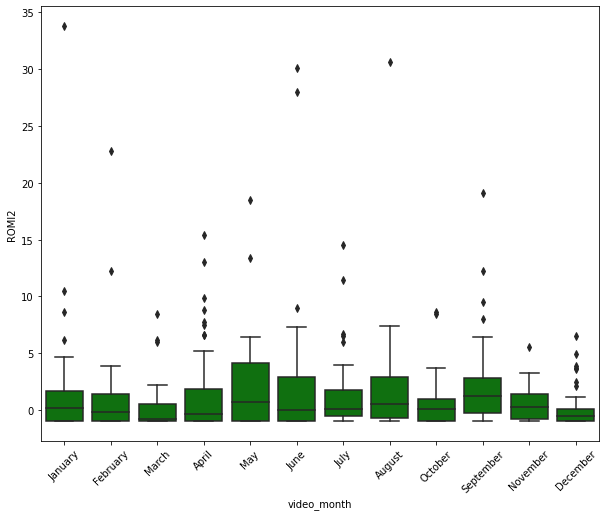

In [173]:
plt.figure(figsize=(10, 8))
g1 = sns.boxplot(y='ROMI2', x='video_month', 
                  data=data, color='green')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

Лучшие месяцы - май, июнь и август, худшие - декабрь и март

Зависимоть дохода по месяцам:

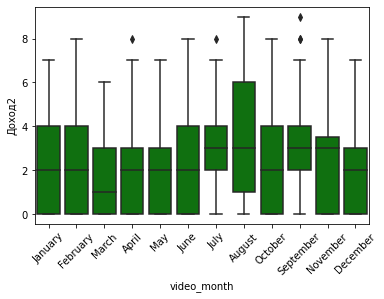

In [174]:
g1 = sns.boxplot(y='Доход2', x='video_month', 
                  data=data, color='green')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

Самый высокий доход случается в августе, высокие медианные значения дохода в июле, августе и сентябре

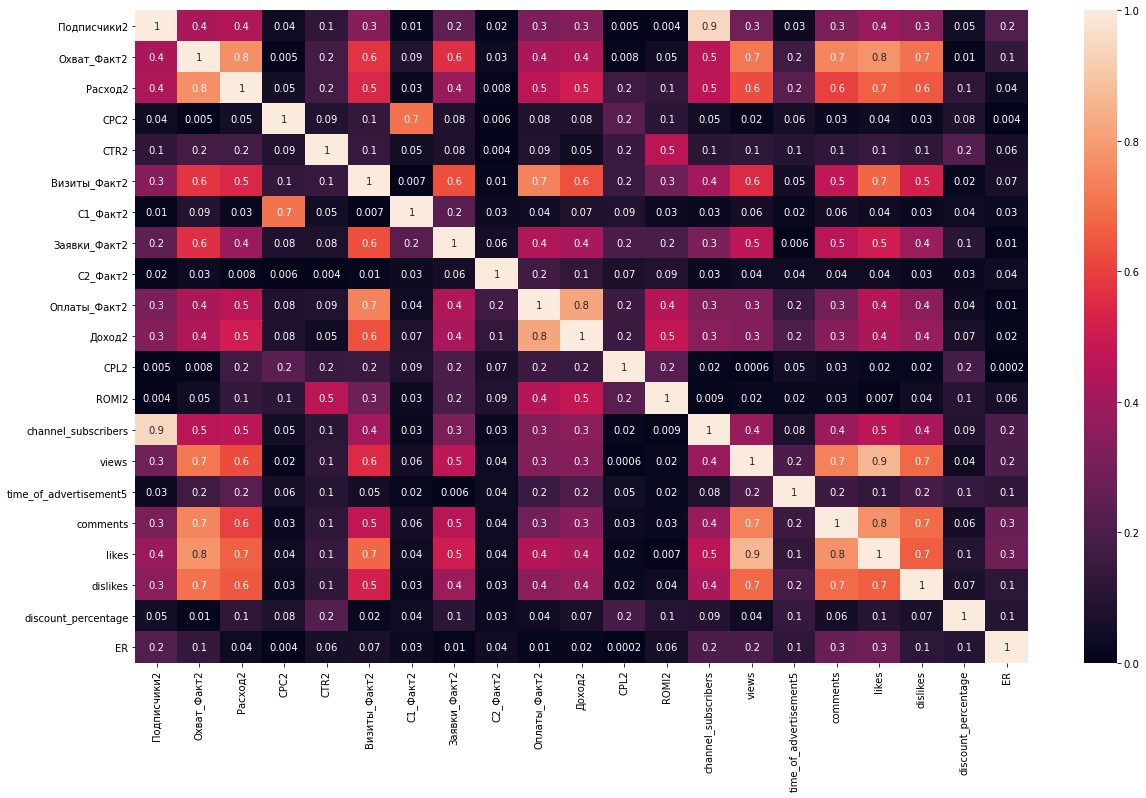

In [175]:
plt.figure(figsize=(20, 12))
sns.heatmap(data[num_cols].corr().abs(),annot=True,vmin=0,vmax=1,fmt=".1g")

Выводы по графику корреляции:
    -Коэф.корр 0.9 между 'Подписчики2' и 'channel_subscribers'. Так как второй признак это просто прирост первого со временем.
    -Коэф.корр 0.9 между   'views'и 'likes'. Так ка выбраны каналы которые нравятся пользователям.
    -Коэф.корр 0.8 между    'Оплаты_Факт2'и 'Доход2'. Логично, что доход зависит от количеста оплат.
    -Коэф.корр 0.8 между 'Охват_Факт2' и 'views'. Второй признак  - это так же прирост первого со временем.
    -Коэф.корр выше между 'views'и 'likes' чем между 'views'и 'dislikes'. Видео больше нравятся пользователям.
    
Целевая переменная 'ROMI2':
    -Коэф.корр 0.5 между 'ROMI2' и 'Доход2' Так как эт доходные статьи они взаимосвязаны
    -Коэф.корр 0.5 между 'ROMI2' и  'CTR2'(Конверсия просмотров в переход ). Говорит о том, что клиенты перешедши по ссылке в итоге часто совершают оплату.
    -Коэф.корр 0.4 между 'ROMI2' и 'Оплаты_Факт2' не близка к 1 только потому, что иногда больше затрат и они снижают прибыль.

Посмотрим какой признак важнее для нашего таргета:

E:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


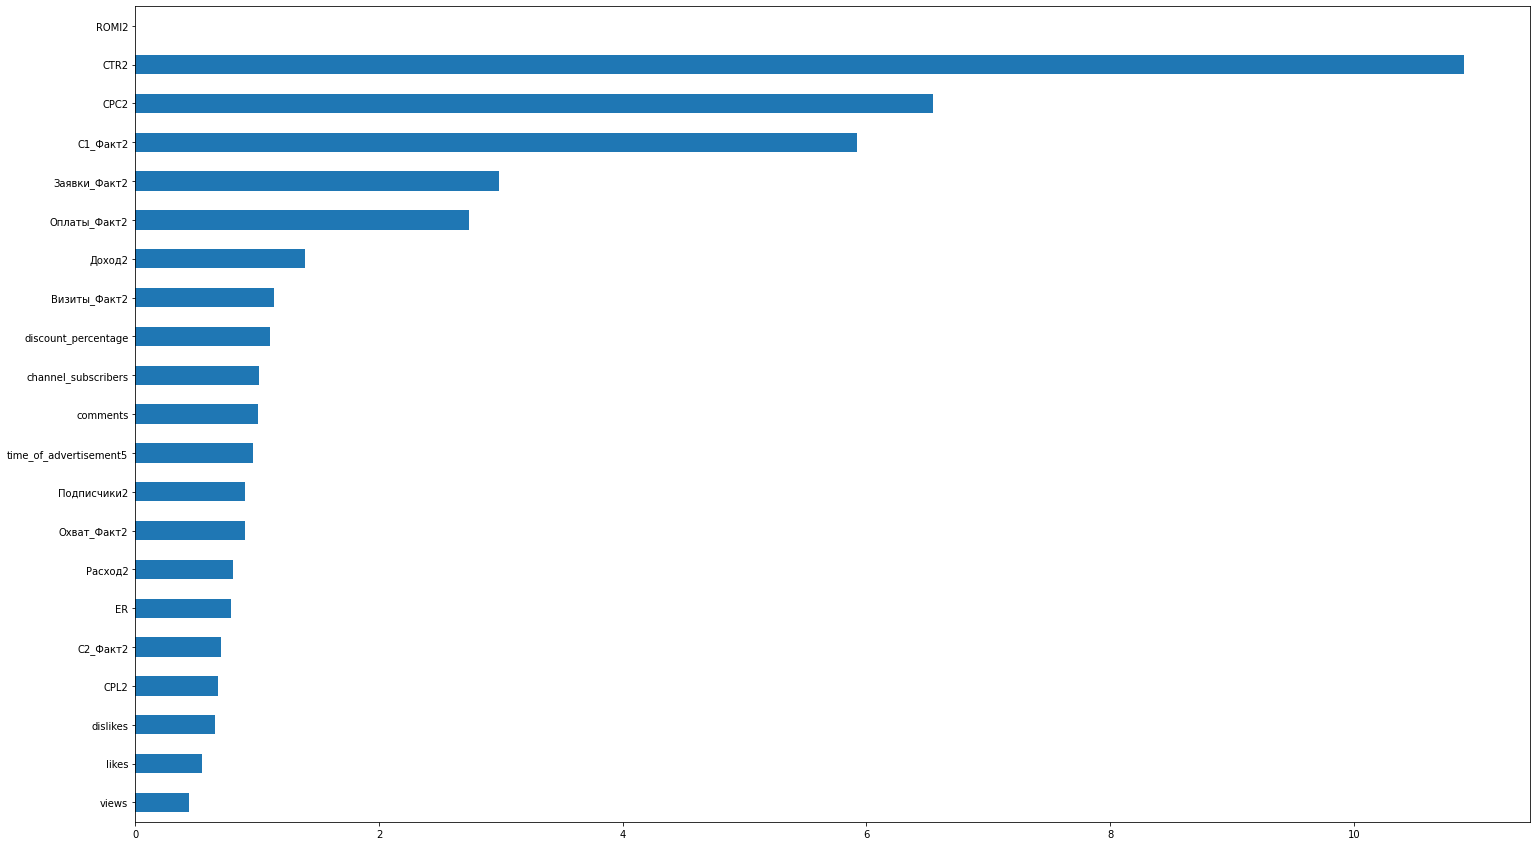

In [176]:
from sklearn.feature_selection import f_classif, mutual_info_classif


df_temp = data.loc[data['ROMI2']>-1]
imp_num = pd.Series(f_classif(df_temp[num_cols], df_temp['ROMI2'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh',figsize=(25,15))


## Категориальные признаки + новые фичи

In [177]:
cat_cols = ['Линейка_nums','месяц_nums','год_nums']
new_cols  = ['Линейка3_romi','Месяц_romi','год_romi','days_romi','time_of_advertisement6_romi']

In [178]:
data.head()

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2,time_of_advertisement3,time_of_advertisement4,time_of_advertisement5
0,2019,15.01.2020,январь,Flatingo,Интеграция,GD,Кодинг,52 027,42 225,р.4 500,р.15,"0,72%",304,"11,2%",34.00000,"0,0%",0,0,р.132,-100%,https://www.youtube.com/watch?v=aqSjawK_QwA,aqSjawK_QwA,https://www.youtube.com/watch?v=aqSjawK_QwA,Flatingo. Разработчик игр,270000.00000,Как разработчики делят игры / Создание игр и и...,2019-01-14 4:23:02,2019.00000,January,Monday,107619.00000,3M46S,00m02,1.00000,Игры,405.00000,3548.00000,320.00000,"['флатинго', 'flatingo', 'Новичков андрей', 'р...",# Игровые ассеты 2D и 3D - https://craftpix.pa...,NaN,0.00000,NaN,0.01580,52027.00000,42225.00000,4500.00000,15.00000,0.00720,304.00000,0.11200,34.00000,0.00000,0.00000,0,132.00000,-1.00000,0.00000,2.00000,2.00000
1,2020,15.01.2020,январь,Johe News,Интеграция,PWS,Кодинг,9 000,6 389,р.5 000,р.40,"1,94%",124,"4,0%",5.00000,"0,0%",0,0,р.1 000,-100%,https://www.youtube.com/watch?v=o7h1-6U1u1g&t=...,o7h1-6U1u1g,https://www.youtube.com/watch?v=o7h1-6U1u1g,Johe News,14600.00000,Raspberry Pi лучшие проекты,2020-01-17 11:58:16,2020.00000,January,Friday,62889.00000,31M41S,02m42,2.00000,Наука и технологии,366.00000,1955.00000,700.00000,"['программирование', 'tech', 'webdev', 'progra...","Если захотите купить крипту, моя рефералка на ...",NaN,0.00000,NaN,0.20690,9000.00000,6389.00000,5000.00000,40.00000,0.01940,124.00000,0.04000,5.00000,0.00000,0.00000,0,1000.00000,-1.00000,2.00000,42.00000,162.00000
2,2020,15.01.2020,январь,PRO роботов,Интеграция,DST,Data Science,38 000,6 900,р.7 500,р.46,"2,38%",164,"7,9%",13.00000,"23,1%",3,4,р.577,3380%,https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...,mk8OsCBZ-yw,https://www.youtube.com/watch?v=mk8OsCBZ-yw,PRO роботов,136000.00000,"20+ Самых Невероятных Изобретений, Которые Изм...",2020-01-23 13:33:38,2020.00000,January,Thursday,112566.00000,10M14S,04m13,5.00000,Наука и технологии,493.00000,2866.00000,210.00000,"['технология', 'новые технологии', 'современны...","20+ Самых Невероятных Изобретений, Которые Изм...",PRO Роботов,25.00000,15.02.2020,0.02620,38000.00000,6900.00000,7500.00000,46.00000,0.02380,164.00000,0.07900,13.00000,0.23100,3.00000,4,577.00000,33.80000,4.00000,13.00000,253.00000
3,2020,15.01.2020,январь,Хауди Хо,Интеграция,PWS,Кодинг,842 000,50 000,р.25 000,р.15,"3,39%",1697,"6,5%",111.00000,"5,4%",6,4,р.225,1044%,https://youtu.be/M8fhrtvedHA,M8fhrtvedHA,https://www.youtube.com/watch?v=M8fhrtvedHA,Хауди Хо™ - Просто о мире IT!,1560000.00000,Пишем TELEGRAM бота на Python,2020-01-24 18:33:25,2020.00000,January,Friday,560514.00000,12M58S,06m52,6.00000,Наука и технологии,2404.00000,22013.00000,668.00000,"['python', 'бот', 'telegram', 'телеграм', 'как...",Урок как создать Telegram бота с нуля.\nНа язы...,NaN,40.00000,31.01.2020,0.01610,842000.00000,50000.00000,25000.00000,15.00000,0.03390,1697.00000,0.06500,111.00000,0.05400,6.00000,4,225.00000,10.44000,6.00000,52.00000,412.00000
4,2020,15.01.2020,январь,Foo52ru,Интеграция,DST,Data Science,35 000,22 000,р.25 000,р.60,"1,90%",418,"4,3%",18.00000,"11,1%",2,3,р.1 389,620%,https://www.youtube.com/watch?v=J9ZgrTAFw60,J9ZgrTAFw60,https://www.youtube.com/watch?v=J9ZgrTAFw60,foo52ru ТехноШаман,62100.00000,Нейронная сеть. Часть 6. Прикручиваю нейросеть...,2020-01-24 4:44:31,2020.00000,January,Friday,59620.00000,9M23S,00m43,2.00000,Наука и технологии,264.00000,4422.00000,68.00000,"['нейросеть', 'нейронные сети', 'pixilang']",Специализация Data 

Рассмотрим признак 'Линейка':

In [179]:
data['Линейка2'] = data['Линейка'].str.lower()
data['Линейка2'] = data['Линейка2'].replace(r'\s+','',regex=True)
data['Линейка2'] = data['Линейка2'].replace('analytics','аналитика',regex=True)
data['Линейка2'] = data['Линейка2'].replace('datascienceаналитика','datascience',regex=True)

In [180]:
data['Линейка2'].value_counts()

кодинг         254
дизайн          73
аналитика       72
datascience     71
менеджмент      28
sf              10
маркетинг        1
Name: Линейка2, dtype: int64

In [181]:
# Закодируем категориальный признак с помощью словаря
Линейка_nums = {'datascience': 1,
 'sf': 2,
 'аналитика': 3,
 'дизайн': 4,
 'кодинг': 5,
 'маркетинг': 6,
 'менеджмент': 7}
data['Линейка_nums'] = data['Линейка2']
data['Линейка_nums'] = data['Линейка_nums'].replace(Линейка_nums)

In [182]:
# Создадим новый признак зависимость ROMI2 от Линейка2
lineyka = data.groupby(by = 'Линейка2')['ROMI2'].agg(['mean','min','max'])

Text(0.5, 1.0, 'Зависимость ROMI от линейки курсов')

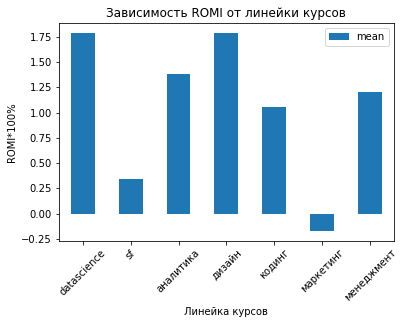

In [183]:
# Выберем для нашего признака среднее, т.к. оно наименее чувствительно к выбросам

lineyka.plot( y = 'mean', kind = 'bar', rot=45,)
plt.ylabel('ROMI*100%')
plt.xlabel('Линейка курсов')
plt.title("Зависимость ROMI от линейки курсов")

In [184]:
lineyka_slov = data.groupby(by = 'Линейка2')['ROMI2'].agg('mean')
slov = lineyka_slov.to_dict()
slov

{'datascience': 1.7854929577464784,
 'sf': 0.3430000000000001,
 'аналитика': 1.3826388888888888,
 'дизайн': 1.7883561643835617,
 'кодинг': 1.05251968503937,
 'маркетинг': -0.17,
 'менеджмент': 1.2017857142857142}

In [185]:
# Новый признак среднее Romi от линейки курсов
data['Линейка3_romi'] = data['Линейка2']
data['Линейка3_romi'] = data['Линейка3_romi'].replace(slov)


Признак 'video_month':

In [186]:
data['video_month'].value_counts()

April        63
June         48
December     47
November     43
July         43
October      42
September    40
August       39
March        39
February     38
January      29
May          24
Name: video_month, dtype: int64

In [187]:
data['video_month'].fillna(0,inplace=True)

In [188]:
# Закодируем категориальный признак
месяц_nums = {'August': 8,
 'April': 4,
 'December': 12,
 'July': 7,
 'June': 6,
 'May': 5,
 'March': 3,
 'November': 11,
 'October': 10,
 'September': 9,
 'Zero' :13,            
 'February': 2,
 'January': 1}
data['месяц_nums'] = data['video_month']
data['месяц_nums'] = data['месяц_nums'].replace(месяц_nums)

Создадим новый признак  - зависимость ROMI2 от месяца

In [189]:
months = data.groupby(by = 'video_month')['ROMI2'].agg('mean')

Text(0.5, 1.0, 'Средний ROMI на ролик по месяцам')

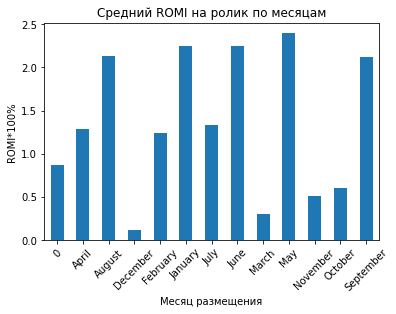

In [190]:
months.plot( y = 'mean', kind = 'bar', rot=45,)
plt.ylabel('ROMI*100%')
plt.xlabel('Месяц размещения')
plt.title("Средний ROMI на ролик по месяцам")

In [191]:
slov_months = months.to_dict()

In [192]:
slov_months

{0: 0.8671428571428571,
 'April': 1.2917460317460319,
 'August': 2.1302564102564103,
 'December': 0.11872340425531915,
 'February': 1.239473684210526,
 'January': 2.2503448275862072,
 'July': 1.3327906976744186,
 'June': 2.248333333333333,
 'March': 0.2971794871794873,
 'May': 2.3995833333333336,
 'November': 0.5113953488372093,
 'October': 0.5983333333333333,
 'September': 2.1262499999999998}

In [193]:
# Новый признак среднее Romi от месяца
data['Месяц_romi'] = data['video_month']
data['Месяц_romi'] = data['Месяц_romi'].replace(slov_months)

In [194]:
# Посмотри признак год:
data['год'].value_counts()

2020    358
2021    145
2019      6
Name: год, dtype: int64

In [195]:
# Закодируем категориальный признак
data['год'] = data['год'].astype(str)
год_nums = {
    '2020' :1,
    '2021' :2,
    '2019' :3,
}
data['год_nums'] = data['год']
data['год_nums'] = data['год_nums'].replace(год_nums)

In [196]:
# Создадим новы признак - зависимость ROMI2  от года:


Text(0.5, 1.0, 'Средний ROMI на ролик по годам')

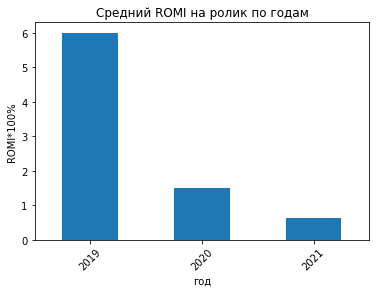

In [197]:
years = data.groupby(by = 'год')['ROMI2'].agg('mean')
years.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.title("Средний ROMI на ролик по годам")
# Обратим внимание, что коэффициент возврата инвестиций год от года снижается

In [198]:
years

год
2019   6.00000
2020   1.48567
2021   0.64310
Name: ROMI2, dtype: float64

Text(0.5, 1.0, 'Средний расход на ролик по годам')

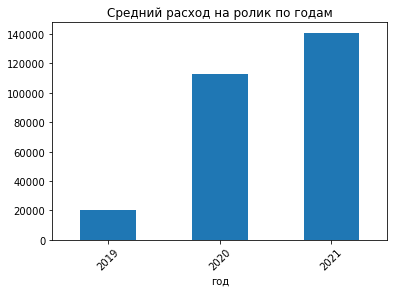

In [199]:
years_rashod = data.groupby(by = 'год')['Расход2'].agg('mean')
years_rashod.plot( y = 'mean', kind = 'bar', rot=45,)
plt.title("Средний расход на ролик по годам")
# Расход денег на рекламу растет

Text(0.5, 1.0, 'Средний доход на ролик по годам')

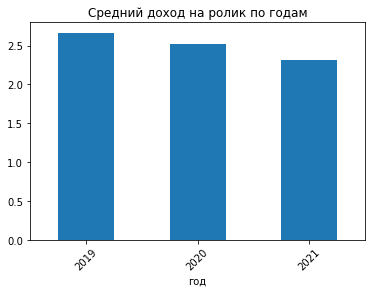

In [200]:
years_rashod = data.groupby(by = 'год')['Доход2'].agg('mean')
years_rashod.plot( y = 'mean', kind = 'bar', rot=45,)
plt.title("Средний доход на ролик по годам")
# Доход потихоньку уменьшается, значит эффекта от рекламы меньше

In [201]:
slov_years =years.to_dict()
slov_years

{'2019': 6.0, '2020': 1.4856703910614542, '2021': 0.6431034482758621}

In [202]:
data['год_romi'] = data['год']
data['год_romi'] = data['год_romi'].replace(slov_years)

Посмотрим на признак 'day_of_week':

In [203]:
data['day_of_week'].value_counts()

Thursday     92
Tuesday      87
Wednesday    73
Saturday     71
Friday       64
Sunday       58
Monday       50
Name: day_of_week, dtype: int64

In [204]:
data['day_of_week'].isna().sum()

14

In [205]:
data['day_of_week'].fillna(0,inplace=True)

In [206]:
days = data.groupby(by = 'day_of_week')['ROMI2'].agg('mean')

Text(0.5, 1.0, 'Средний ROMI на ролик по дням недели')

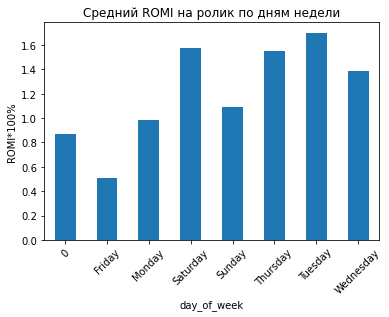

In [207]:
days.plot( y = 'mean', kind = 'bar', rot=45,)
plt.ylabel('ROMI*100%')
plt.title("Средний ROMI на ролик по дням недели")

In [208]:
slov_days =days.to_dict()
slov_days

{0: 0.8671428571428571,
 'Friday': 0.5092187499999998,
 'Monday': 0.9873999999999999,
 'Saturday': 1.5756338028169012,
 'Sunday': 1.0953448275862068,
 'Thursday': 1.5503260869565216,
 'Tuesday': 1.7006896551724133,
 'Wednesday': 1.3839726027397259}

In [209]:
# Новый признак зависимость ROMI от дня недели
data['days_romi'] = data['day_of_week']
data['days_romi'] = data['days_romi'].replace(slov_days)

In [210]:
# Закодируем категориальный признак day_of_week:
#days_nums = {
#    {'0': 1,
# 'Friday':2,
# 'Monday': 3,
# 'Saturday': 4,
# 'Sunday': 5,
# 'Thursday': 6,
# 'Tuesday': 7,
# 'Wednesday': 8}
#}
#data['days_nums'] = data['day_of_week']
#data['days_nums'] = data['days_nums'].replace(год_nums)

In [211]:
# Поработаем с длительностью ролика и длительностью рекламы:
# В итоге у меня получился числовой столбец, добавим его к num_cols
data['time_of_advertisement3'] = data['time_of_advertisement'].str.split('m').str[0]
data['time_of_advertisement4'] = data['time_of_advertisement'].str.split('m').str[1]
data[["time_of_advertisement3", "time_of_advertisement4"]] = data[["time_of_advertisement3", "time_of_advertisement4"]].apply(pd.to_numeric)
data['time_of_advertisement5'] = data['time_of_advertisement3']*60+data['time_of_advertisement4']
data['time_of_advertisement5'].describe()

count    494.00000
mean     288.02632
std      365.17164
min        1.00000
25%       67.00000
50%      195.00000
75%      359.75000
max     2683.00000
Name: time_of_advertisement5, dtype: float64

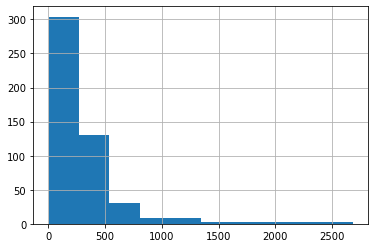

In [212]:
data['time_of_advertisement5'].hist()

In [213]:
data['time_of_advertisement5'].isna().sum()

15

In [214]:
data['time_of_advertisement5'].fillna(0,inplace=True)

In [215]:
# Содадим новый признак  - зависимость ROMI от длинны объявления data['time_of_advertisement5']
def choose(x):
    ''' Функция позволяет разделить числовой столбец на промежутки по длинне ролика'''
    if x<300:
        return 'до 5 мин'
    if  300<=x<600:
        return 'от 5 мин до 10 мин'
    if 600<=x<1200:
        return 'от 10 мин до 20 мин'
    if x>=1200:
        return ' более 20 мин'

In [216]:
data['time_of_advertisement6'] = data['time_of_advertisement5'].apply(lambda x: choose(x) )

In [217]:
data['time_of_advertisement6']

0                до 5 мин
1                до 5 мин
2                до 5 мин
3      от 5 мин до 10 мин
4                до 5 мин
              ...        
582              до 5 мин
583              до 5 мин
584              до 5 мин
585          более 20 мин
586              до 5 мин
Name: time_of_advertisement6, Length: 509, dtype: object

In [218]:
time_of_advert = data.groupby(by = 'time_of_advertisement6')['ROMI2'].agg('mean')

Text(0, 0.5, 'ROMI*100%')

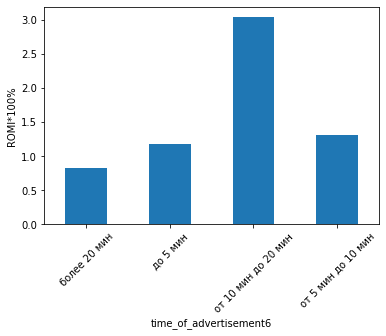

In [219]:
# Самые выгодные ролики длиной от 10 до 20 мин
time_of_advert.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')


In [220]:
time_of_advert_slov =time_of_advert.to_dict()

In [221]:
time_of_advert_slov

{' более 20 мин': 0.8324999999999998,
 'до 5 мин': 1.1725368731563421,
 'от 10 мин до 20 мин': 3.039285714285714,
 'от 5 мин до 10 мин': 1.3111904761904765}

In [222]:
data['time_of_advertisement6_romi'] = data['time_of_advertisement6']
data['time_of_advertisement6_romi'] = data['time_of_advertisement6_romi'].replace(time_of_advert_slov)

In [223]:
# Создадим категориальную переменную для likes
data['likes'].describe()

count      509.00000
mean     21713.57957
std      30618.82665
min          0.00000
25%       5462.00000
50%      13814.00000
75%      25295.00000
max     336394.00000
Name: likes, dtype: float64

In [224]:
def choose_likes(x):
    ''' Функция позволяет разделить числовой столбец на промежутки по длинне ролика'''
    if x<5462:
        return 'лайков меньше 5462'
    if  5462<=x<13814:
        return 'лайков от 5462 до 13814'
    if 13814<=x<25295:
        return 'лайков от 13814 до 25295'
    if x>=25295:
        return ' лайков больше 25295'

In [225]:
data['likes2'] = data['likes'].apply(lambda x: choose_likes(x) )

In [226]:
data['likes2']

0            лайков меньше 5462
1            лайков меньше 5462
2            лайков меньше 5462
3      лайков от 13814 до 25295
4            лайков меньше 5462
                 ...           
582          лайков меньше 5462
583    лайков от 13814 до 25295
584         лайков больше 25295
585    лайков от 13814 до 25295
586         лайков больше 25295
Name: likes2, Length: 509, dtype: object

Text(0.5, 1.0, 'Средний ROMI от количества лайков')

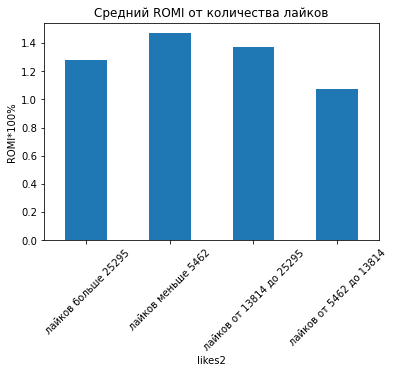

In [227]:
likes_to_ROMI = data.groupby(by = 'likes2')['ROMI2'].agg('mean')
likes_to_ROMI.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.title("Средний ROMI от количества лайков")

Text(0.5, 1.0, 'Средний Доход от количества лайков')

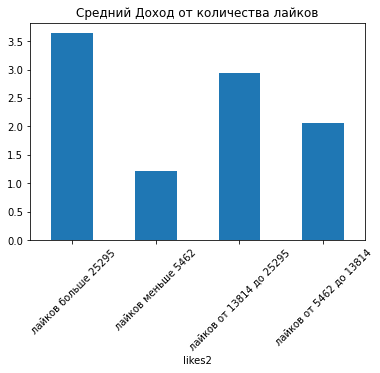

In [228]:
likes_to_ROMI = data.groupby(by = 'likes2')['Доход2'].agg('mean')
likes_to_ROMI.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('')
plt.title("Средний Доход от количества лайков")

In [229]:
data['Название'][data['Доход2']>=8].drop_duplicates()

63        InvestFuture
84            Варламов
92            Редакция
173     Dmitry Puchkov
195             Усачев
196           The Люди
205          Асафьев 2
249    Артемий Лебедев
302       А поговорить
358      Руслан Усачев
Name: Название, dtype: object

In [230]:
data['Название'][data['ROMI2']>=10].drop_duplicates()

2             PRO роботов
3                Хауди Хо
13     Web Developer Blog
33              Johe News
36                  MyGap
45            АйТи Борода
59          Anna Lomakina
60             Даша Снейл
114        Лана Глушакова
173        Dmitry Puchkov
228              litobzor
471             Pingvinus
Name: Название, dtype: object

In [231]:
data['Доход2'].describe()

count   509.00000
mean      2.46562
std       2.34128
min       0.00000
25%       0.00000
50%       2.00000
75%       4.00000
max       9.00000
Name: Доход2, dtype: float64

In [232]:
data['ROMI2'].describe()

count   509.00000
mean      1.29886
std       4.04749
min      -1.00000
25%      -1.00000
50%       0.00000
75%       1.74000
max      33.80000
Name: ROMI2, dtype: float64

#### Dummy переменные:

In [233]:
data[cat_cols].head()

,Линейка_nums,месяц_nums,год_nums
0,5,1,3
1,5,1,1
2,1,1,1
3,5,1,1
4,1,1,1


In [234]:
data = pd.get_dummies(data,prefix=cat_cols, columns=cat_cols)

In [235]:
data.head()

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2,time_of_advertisement3,time_of_advertisement4,time_of_advertisement5,Линейка2,Линейка3_romi,Месяц_romi,год_romi,days_romi,time_of_advertisement6,time_of_advertisement6_romi,likes2,Линейка_nums_1,Линейка_nums_2,Линейка_nums_3,Линейка_nums_4,Линейка_nums_5,Линейка_nums_6,Линейка_nums_7,месяц_nums_0,месяц_nums_1,месяц_nums_2,месяц_nums_3,месяц_nums_4,месяц_nums_5,месяц_nums_6,месяц_nums_7,месяц_nums_8,месяц_nums_9,месяц_nums_10,месяц_nums_11,месяц_nums_12,год_nums_1,год_nums_2,год_nums_3
0,2019,15.01.2020,январь,Flatingo,Интеграция,GD,Кодинг,52 027,42 225,р.4 500,р.15,"0,72%",304,"11,2%",34.00000,"0,0%",0,0,р.132,-100%,https://www.youtube.com/watch?v=aqSjawK_QwA,aqSjawK_QwA,https://www.youtube.com/watch?v=aqSjawK_QwA,Flatingo. Разработчик игр,270000.00000,Как разработчики делят игры / Создание игр и и...,2019-01-14 4:23:02,2019.00000,January,Monday,107619.00000,3M46S,00m02,1.00000,Игры,405.00000,3548.00000,320.00000,"['флатинго', 'flatingo', 'Новичков андрей', 'р...",# Игровые ассеты 2D и 3D - https://craftpix.pa...,NaN,0.00000,NaN,0.01580,52027.00000,42225.00000,4500.00000,15.00000,0.00720,304.00000,0.11200,34.00000,0.00000,0.00000,0,132.00000,-1.00000,0.00000,2.00000,2.00000,кодинг,1.05252,2.25034,6.00000,0.98740,до 5 мин,1.17254,лайков меньше 5462,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2020,15.01.2020,январь,Johe News,Интеграция,PWS,Кодинг,9 000,6 389,р.5 000,р.40,"1,94%",124,"4,0%",5.00000,"0,0%",0,0,р.1 000,-100%,https://www.youtube.com/watch?v=o7h1-6U1u1g&t=...,o7h1-6U1u1g,https://www.youtube.com/watch?v=o7h1-6U1u1g,Johe News,14600.00000,Raspberry Pi лучшие проекты,2020-01-17 11:58:16,2020.00000,January,Friday,62889.00000,31M41S,02m42,2.00000,Наука и технологии,366.00000,1955.00000,700.00000,"['программирование', 'tech', 'webdev', 'progra...","Если захотите купить крипту, моя рефералка на ...",NaN,0.00000,NaN,0.20690,9000.00000,6389.00000,5000.00000,40.00000,0.01940,124.00000,0.04000,5.00000,0.00000,0.00000,0,1000.00000,-1.00000,2.00000,42.00000,162.00000,кодинг,1.05252,2.25034,1.48567,0.50922,до 5 мин,1.17254,лайков меньше 5462,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2020,15.01.2020,январь,PRO роботов,Интеграция,DST,Data Science,38 000,6 900,р.7 500,р.46,"2,38%",164,"7,9%",13.00000,"23,1%",3,4,р.577,3380%,https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...,mk8OsCBZ-yw,https://www.youtube.com/watch?v=mk8OsCBZ-yw,PRO роботов,136000.00000,"20+ Самых Невероятных Изобретений, Которые Изм...",2020-01-23 13:33:38,2020.00000,January,Thursday,112566.00000,10M14S,04m13,5.00000,Наука и технологии,493.00000,2866.00000,210.00000,"['технология', 'новые технологии', 'современны...","20+ Самых Невероятных Изобретений, Которые Изм...",PRO Роботов,25.00000,15.02.2020,0.02620,38000.00000,6900.00000,7500.00000,46.00000,0.02380,164.00000,0.07900,13.00000,0.23100,3.00000,4,577.00000,33.80000,4.00000,13.00000,253.00000,datascience,1.78549,2.25034,1.48567,1.55033,до 5 мин,1.17254,лайков меньше 5462,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2020,15.01.2020,январь,Хауди Хо,Интеграция,PWS,Кодинг,842 000,50 000,р.25 000,р.15,"3,39%",1697,"6,5%",111.00000,"5,4%",6,4,р.225,1044%,https://youtu.be/M8fhrtvedHA,M8fhrtvedHA,https://www.youtube.com/watch?v=M8fhrtvedHA,Хауди Хо™ - Просто о мире IT!,1560000.00000,Пишем TELEGRAM бота на Python,2020-01-24 18:33:25,2020.00000,January,Friday,560514.00000,12M58S,06m52,6.00000,Наука и технологии,2404.00000,22013.00000,668.00000,"['pyt

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 586
Data columns (total 91 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   год                                509 non-null    object 
 1   Дата                               509 non-null    object 
 2   Месяц                              509 non-null    object 
 3   Название                           509 non-null    object 
 4   Формат                             509 non-null    object 
 5   Тег_(курс)                         509 non-null    object 
 6   Линейка                            509 non-null    object 
 7   Подписчики                         500 non-null    object 
 8   Охват_Факт                         503 non-null    object 
 9   Расход                             509 non-null    object 
 10  CPC                                504 non-null    object 
 11  СTR                                504 non-null    object 

## Выводы для презентации

количество размещений у одного и того же блогера: как меняется эффективность размещений;

In [237]:
data['video_date']

0       2019-01-14 4:23:02
1      2020-01-17 11:58:16
2      2020-01-23 13:33:38
3      2020-01-24 18:33:25
4       2020-01-24 4:44:31
              ...         
582    2021-04-29 11:30:05
583    2021-04-27 13:27:44
584     2021-04-29 6:00:02
585     2021-04-29 8:51:05
586     2021-04-30 8:20:09
Name: video_date, Length: 509, dtype: object

In [238]:
data['Название'].value_counts()[0:10]

Хауди Хо          19
Максим Кац        17
Асафьев           13
Кик Обзор         12
InvestFuture       9
PRO роботов        8
MyGap              7
Dmitry Puchkov     7
Pingvinus          7
Варламов           6
Name: Название, dtype: int64

In [239]:
data.groupby(by = 'Название')['ROMI2'].agg('mean')

Название
 Extreme Code    0.13000
#ЧУДОТЕХНИКИ    -1.00000
808             -0.33000
Alex Gyver       0.53000
AlexGyver        1.47000
                  ...   
консервы        -0.04000
космос просто   -0.76500
лидин            0.41000
не спойлер      -1.00000
эпизоды          0.75000
Name: ROMI2, Length: 290, dtype: float64

In [240]:
haudi_co = data[data['Название']=='Хауди Хо'].groupby(by = 'video_date')['ROMI2'].mean()

Text(0.5, 1.0, 'Хауди Хо')

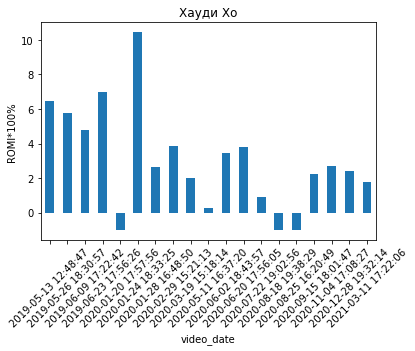

In [241]:
haudi_co.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.title("Хауди Хо")

In [242]:
maxim_cats = data[data['Название']=='Максим Кац'].groupby(by = 'video_date')['ROMI2'].mean()

Text(0.5, 1.0, 'Максим Кац')

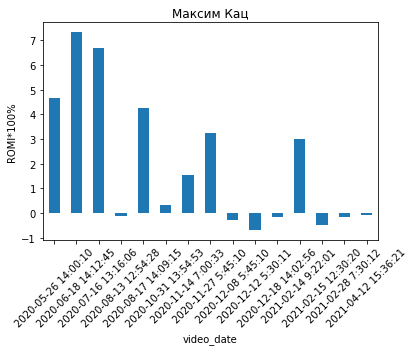

In [243]:
maxim_cats.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.title("Максим Кац")

In [244]:
asafiev = data[data['Название']=='Асафьев'].groupby(by = 'video_date')['ROMI2'].mean()


Text(0.5, 1.0, 'Асафьев')

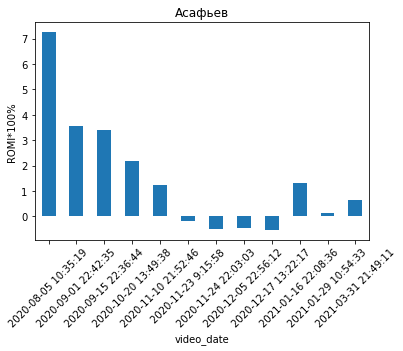

In [245]:
asafiev.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.title("Асафьев")

In [246]:
kik_obzor = data[data['Название']=='Кик Обзор'].groupby(by = 'video_date')['ROMI2'].mean()

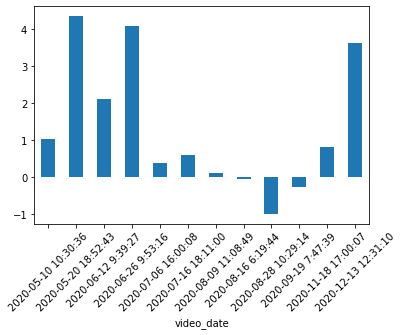

In [247]:
kik_obzor.plot( y = 'mean', kind = 'bar', rot=45)

 на какой минуте (процент времени от видео) лучше размещаться;

In [248]:
time_of_adver = data.groupby(by = 'part_of_video_with_ad_from1_to_10')['ROMI2'].agg('mean')

Text(0.5, 0, 'Часть видео в которой размещается ролик 10/10')

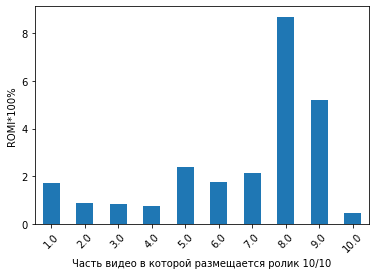

In [249]:
time_of_adver.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.xlabel('Часть видео в которой размещается ролик 10/10')

как размер скидки влияет на CTR, количество лидов, количество продаж и ROMI;

In [250]:
data['discount_percentage'].value_counts()

45.00000    176
50.00000    143
55.00000     75
0.00000      61
35.00000     23
60.00000      8
40.00000      6
10.00000      5
25.00000      5
15.00000      3
5.00000       2
20.00000      2
Name: discount_percentage, dtype: int64

Text(0.5, 1.0, 'Зависимость ROMI от размера скидки')

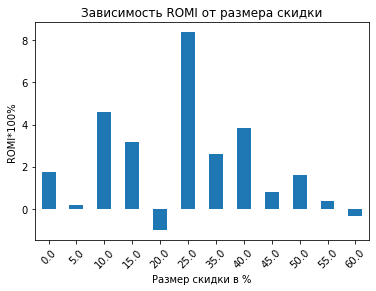

In [251]:
discount_romi = data.groupby(by = 'discount_percentage')['ROMI2'].agg('mean')
discount_romi.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.xlabel('Размер скидки в %')
plt.title("Зависимость ROMI от размера скидки")

Text(0.5, 1.0, 'Зависимость CTR от размера скидки')

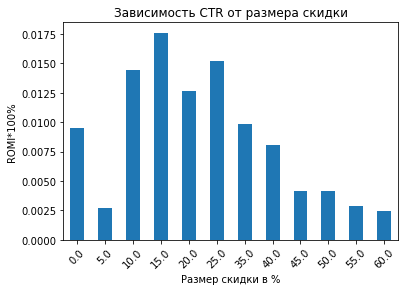

In [252]:
discount_ctr = data.groupby(by = 'discount_percentage')['CTR2'].agg('mean')
discount_ctr.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.xlabel('Размер скидки в %')
plt.title("Зависимость CTR от размера скидки")

In [253]:
discount_lead = data.groupby(by = 'discount_percentage')['Заявки_Факт2'].agg('mean')

Text(0.5, 1.0, 'Зависимость Заявки_Факт от размера скидки')

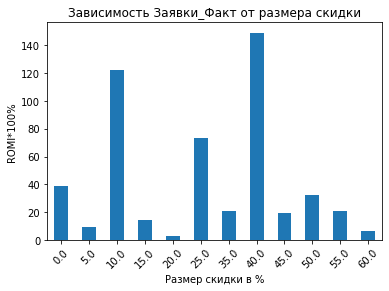

In [254]:
discount_lead.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.xlabel('Размер скидки в %')
plt.title("Зависимость Заявки_Факт от размера скидки")

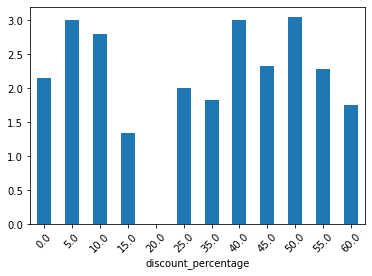

In [255]:
discount_доход = data.groupby(by = 'discount_percentage')['Доход2'].agg('mean')
discount_доход.plot( y = 'mean', kind = 'bar', rot=45)

In [256]:
data['likes'].describe()

count      509.00000
mean     21713.57957
std      30618.82665
min          0.00000
25%       5462.00000
50%      13814.00000
75%      25295.00000
max     336394.00000
Name: likes, dtype: float64

что лучше: когда предоставление скидки ограничено по времени или не ограничено;

In [257]:
# Будем считать, что предоставление скидки не ограничено по времени, когда у нас в данных Nan,
# остальные ячейки заполнены , так что ограничение есть

In [258]:
data['discount_until_date'].isna().sum()

143

In [259]:
data['discount_until_date'].fillna(0,inplace=True)

In [260]:
data1 = data[data['discount_until_date']==0]

In [261]:
data2 = data[data['discount_until_date']!=0]

In [262]:
data1['ROMI2'].mean()

1.8332867132867139

In [263]:
data1['Доход2'].mean()

2.6573426573426575

In [264]:
data2['ROMI2'].mean()

1.0900546448087425

In [265]:
data2['Доход2'].mean()

2.390710382513661

Сравнив по Доходу и ROMI получаем, что лучше, когда скидка не ограничена по времени

 сколько в среднем дней лучше указывать до конца скидки, чтобы добиться максимального эффекта;

In [266]:
from datetime import datetime, timedelta
data2['video_date1'] = pd.to_datetime(data2['video_date'])


<ipython-input-266-766bef32c8f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['video_date1'] = pd.to_datetime(data2['video_date'])


In [267]:
#data2['discount_until_date1'].values

In [268]:
data2['discount_until_date1'] = data2['discount_until_date'].replace('\u200c31.01.2021','31.01.2021',regex=True)
#'\u200c31.01.2021'
#'1.09.2020'
data2['discount_until_date1'] = data2['discount_until_date1'].replace('1.09.2020','01.09.2020',regex=True)
#'001.09.2020'
data2['discount_until_date1'] = data2['discount_until_date1'].replace('001.09.2020','01.09.2020',regex=True)
#'301.09.2020'
data2['discount_until_date1'] = data2['discount_until_date1'].replace('301.09.2020','30.09.2020',regex=True)
#'31.04.2021'
data2['discount_until_date1'] = data2['discount_until_date1'].replace('31.04.2021','30.04.2021',regex=True)

<ipython-input-268-55c9ef5e1c8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['discount_until_date1'] = data2['discount_until_date'].replace('\u200c31.01.2021','31.01.2021',regex=True)
<ipython-input-268-55c9ef5e1c8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['discount_until_date1'] = data2['discount_until_date1'].replace('1.09.2020','01.09.2020',regex=True)
<ipython-input-268-55c9ef5e1c8d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [269]:
data2['discount_until_date2'] = pd.to_datetime(data2['discount_until_date1'], format="%d.%m.%Y")

<ipython-input-269-3d7dfd5c92b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['discount_until_date2'] = pd.to_datetime(data2['discount_until_date1'], format="%d.%m.%Y")


In [270]:
data2['delta'] = data2['discount_until_date2']-data2['video_date1']

<ipython-input-270-dbf0b02e7c68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['delta'] = data2['discount_until_date2']-data2['video_date1']


In [271]:
delta = data2.groupby(by = 'delta')['ROMI2'].agg('mean')

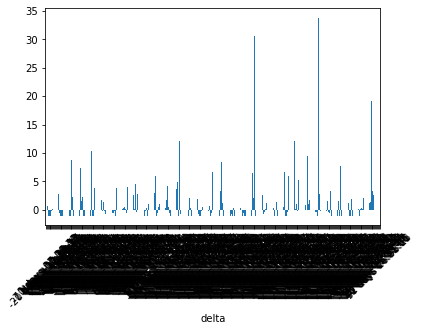

In [272]:
delta.plot( y = 'mean', kind = 'bar', rot=45)

In [273]:
delta.values

array([ 3.430e+00, -2.000e-01,  6.300e-01, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.200e-01,  1.500e-01, -1.000e+00, -1.000e+00,
        6.550e+00,  2.430e+00,  6.600e-01,  5.400e-01,  2.860e+00,
       -6.200e-01, -1.000e+00, -1.000e+00, -1.000e+00,  2.900e-01,
        2.700e-01, -6.200e-01, -2.600e-01,  3.230e+00, -6.200e-01,
       -1.000e+00, -1.000e+00, -1.000e+00,  8.830e+00,  2.330e+00,
       -1.000e+00, -1.000e+00, -1.000e+00,  3.230e+00, -1.000e+00,
       -4.900e-01,  6.100e-01, -1.000e+00,  7.400e+00,  1.510e+00,
        2.210e+00, -1.000e+00, -1.000e+00, -1.000e+00,  2.580e+00,
       -1.000e+00,  5.300e-01, -1.000e+00, -1.000e+00, -1.000e+00,
        1.044e+01, -1.000e+00, -1.000e+00,  3.840e+00, -1.200e-01,
       -1.000e+00, -1.000e+00,  5.530e+00, -1.000e+00,  2.000e+00,
       -1.900e-01,  1.680e+00, -2.200e-01,  1.380e+00, -1.600e-01,
       -7.900e-01, -1.000e+00,  1.410e+00,  6.200e-01, -1.000e+00,
       -1.000e+00,  5.800e-01, -3.700e-01, -5.500e-01, -5.100e

In [274]:
data2.head()

,год,Дата,Месяц,Название,Формат,Тег_(курс),Линейка,Подписчики,Охват_Факт,Расход,CPC,СTR,Визиты_Факт,С1_Факт,Заявки_Факт,С2_Факт,Оплаты_Факт,Доход,CPL,ROMI,link_x,link_true,link_y,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,Подписчики2,Охват_Факт2,Расход2,CPC2,CTR2,Визиты_Факт2,С1_Факт2,Заявки_Факт2,С2_Факт2,Оплаты_Факт2,Доход2,CPL2,ROMI2,time_of_advertisement3,time_of_advertisement4,time_of_advertisement5,Линейка2,Линейка3_romi,Месяц_romi,год_romi,days_romi,time_of_advertisement6,time_of_advertisement6_romi,likes2,Линейка_nums_1,Линейка_nums_2,Линейка_nums_3,Линейка_nums_4,Линейка_nums_5,Линейка_nums_6,Линейка_nums_7,месяц_nums_0,месяц_nums_1,месяц_nums_2,месяц_nums_3,месяц_nums_4,месяц_nums_5,месяц_nums_6,месяц_nums_7,месяц_nums_8,месяц_nums_9,месяц_nums_10,месяц_nums_11,месяц_nums_12,год_nums_1,год_nums_2,год_nums_3,video_date1,discount_until_date1,discount_until_date2,delta
2,2020,15.01.2020,январь,PRO роботов,Интеграция,DST,Data Science,38 000,6 900,р.7 500,р.46,"2,38%",164,"7,9%",13.00000,"23,1%",3,4,р.577,3380%,https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...,mk8OsCBZ-yw,https://www.youtube.com/watch?v=mk8OsCBZ-yw,PRO роботов,136000.00000,"20+ Самых Невероятных Изобретений, Которые Изм...",2020-01-23 13:33:38,2020.00000,January,Thursday,112566.00000,10M14S,04m13,5.00000,Наука и технологии,493.00000,2866.00000,210.00000,"['технология', 'новые технологии', 'современны...","20+ Самых Невероятных Изобретений, Которые Изм...",PRO Роботов,25.00000,15.02.2020,0.02620,38000.00000,6900.00000,7500.00000,46.00000,0.02380,164.00000,0.07900,13.00000,0.23100,3.00000,4,577.00000,33.80000,4.00000,13.00000,253.00000,datascience,1.78549,2.25034,1.48567,1.55033,до 5 мин,1.17254,лайков меньше 5462,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020-01-23 13:33:38,15.02.2020,2020-02-15,22 days 10:26:22
3,2020,15.01.2020,январь,Хауди Хо,Интеграция,PWS,Кодинг,842 000,50 000,р.25 000,р.15,"3,39%",1697,"6,5%",111.00000,"5,4%",6,4,р.225,1044%,https://youtu.be/M8fhrtvedHA,M8fhrtvedHA,https://www.youtube.com/watch?v=M8fhrtvedHA,Хауди Хо™ - Просто о мире IT!,1560000.00000,Пишем TELEGRAM бота на Python,2020-01-24 18:33:25,2020.00000,January,Friday,560514.00000,12M58S,06m52,6.00000,Наука и технологии,2404.00000,22013.00000,668.00000,"['python', 'бот', 'telegram', 'телеграм', 'как...",Урок как создать Telegram бота с нуля.\nНа язы...,NaN,40.00000,31.01.2020,0.01610,842000.00000,50000.00000,25000.00000,15.00000,0.03390,1697.00000,0.06500,111.00000,0.05400,6.00000,4,225.00000,10.44000,6.00000,52.00000,412.00000,кодинг,1.05252,2.25034,1.48567,0.50922,от 5 мин до 10 мин,1.31119,лайков от 13814 до 25295,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020-01-24 18:33:25,31.01.2020,2020-01-31,6 days 05:26:35
4,2020,15.01.2020,январь,Foo52ru,Интеграция,DST,Data Science,35 000,22 000,р.25 000,р.60,"1,90%",418,"4,3%",18.00000,"11,1%",2,3,р.1 389,620%,https://www.youtube.com/watch?v=J9ZgrTAFw60,J9ZgrTAFw60,https://www.youtube.com/watch?v=J9ZgrTAFw60,foo52ru ТехноШаман,62100.00000,Нейронная сеть. Часть 6. Прикручиваю нейросеть...,2020-01-24 4:44:31,2020.00000,January,Friday,59620.00000,9M23S,00m43,2.00000,Наука и технологии,264.00000,4422.00000,68.00000,"['нейросеть', 'нейронные сети', 'pixilang']",Специализация Data Science в SkillFactory: htt...,foo52ru,25.00000,15.02.2020,0.07660,35000.00000,22000.00000,25000.00000,60.00000,0.01900,418.00000,0.04300,18.00000,0.11100,2.00000,3,1389.00000,6.20000,0.00000,43.00000,43.00000,datascience,1.78549,2.25034,1.48567,0.50922,до 5 мин,1.17254,лайков меньше 5462,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020-01-24 04:44:31,15.02.2020,2020-02-15,21 days 19:15:29
9,2020,01.02.2020,февраль,PRO роботов,Интеграция,DST,Data Science,38 000,18 000,р.7 500,р.89,"0,47%",84,"4,8%",4.00000,"0,0%",0,0,р.1 8

## Построение наивной модели

In [275]:
# Построим наивную модель на основе обработанных числовых признаков. В качестве метрики возьмем MAPE,
# чтобы в дальнейшем оценивать насколько модель лучше/хуже исходной

In [276]:
num_cols

['Подписчики2',
 'Охват_Факт2',
 'Расход2',
 'CPC2',
 'CTR2',
 'Визиты_Факт2',
 'С1_Факт2',
 'Заявки_Факт2',
 'С2_Факт2',
 'Оплаты_Факт2',
 'Доход2',
 'CPL2',
 'ROMI2',
 'channel_subscribers',
 'views',
 'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
 'discount_percentage',
 'ER']

In [277]:
data_model1 = data[num_cols]

In [278]:
data_model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 586
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Подписчики2             509 non-null    float64
 1   Охват_Факт2             509 non-null    float64
 2   Расход2                 509 non-null    float64
 3   CPC2                    509 non-null    float64
 4   CTR2                    509 non-null    float64
 5   Визиты_Факт2            509 non-null    float64
 6   С1_Факт2                509 non-null    float64
 7   Заявки_Факт2            509 non-null    float64
 8   С2_Факт2                509 non-null    float64
 9   Оплаты_Факт2            509 non-null    float64
 10  Доход2                  509 non-null    int64  
 11  CPL2                    509 non-null    float64
 12  ROMI2                   509 non-null    float64
 13  channel_subscribers     509 non-null    float64
 14  views                   509 non-null    fl

In [279]:
X = data_model1.drop(['ROMI2'], axis=1).values
y = data_model1['ROMI2'].values

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [281]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predict_test = lr.predict(X_test)

In [282]:
print(f"Точность модели по метрике MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 177.01%


## Моделирование:

In [283]:
# модель с отфильтрованными числовыми столбцами( оставим только те признаки, которые улучшают метрику)
data_model3 = data[[
 'Охват_Факт2',
 'Расход2',
  'CTR2',
  'С2_Факт2',
 'Оплаты_Факт2',
 'Доход2',
  'ROMI2',
 'channel_subscribers',
  'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
 
 
                  ]]
X = data_model3.drop(['ROMI2'], axis=1).values
y = data_model3['ROMI2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
predict_test = lr.predict(X_test)
print(f"Точность модели по метрике MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 147.90%


In [284]:
# модель с отфильтрованными числовыми + feature столбцами (добавим в модель новые столбцы, улучшающие метрику)
data_model4 = data[[
 'Охват_Факт2',
 'Расход2',
  'CTR2',
  'С2_Факт2',
 'Оплаты_Факт2',
 'Доход2',
  'ROMI2',
 'channel_subscribers',
  'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
    'Линейка3_romi','год_romi','time_of_advertisement6_romi'
 
 
                  ]]
X = data_model4.drop(['ROMI2'], axis=1).values
y = data_model4['ROMI2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
predict_test = lr.predict(X_test)
print(f"Точность модели по метрике MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 125.49%


In [285]:
data.columns

Index(['год', 'Дата', 'Месяц', 'Название', 'Формат', 'Тег_(курс)', 'Линейка',
       'Подписчики', 'Охват_Факт', 'Расход', 'CPC', 'СTR', 'Визиты_Факт',
       'С1_Факт', 'Заявки_Факт', 'С2_Факт', 'Оплаты_Факт', 'Доход', 'CPL',
       'ROMI', 'link_x', 'link_true', 'link_y', 'channel_name',
       'channel_subscribers', 'video_name', 'video_date', 'video_year',
       'video_month', 'day_of_week', 'views', 'video_duration',
       'time_of_advertisement', 'part_of_video_with_ad_from1_to_10',
       'video_category', 'comments', 'likes', 'dislikes', 'tags',
       'description', 'promocode', 'discount_percentage',
       'discount_until_date', 'ER', 'Подписчики2', 'Охват_Факт2', 'Расход2',
       'CPC2', 'CTR2', 'Визиты_Факт2', 'С1_Факт2', 'Заявки_Факт2', 'С2_Факт2',
       'Оплаты_Факт2', 'Доход2', 'CPL2', 'ROMI2', 'time_of_advertisement3',
       'time_of_advertisement4', 'time_of_advertisement5', 'Линейка2',
       'Линейка3_romi', 'Месяц_romi', 'год_romi', 'days_romi',
       'time_o

In [286]:
# модель с отфильтрованными числовыми + feature столбцами+ dummy столбцами
# Видим, что метрика ухудшилась, не будем их дальше использовать
data_model4 = data[[
 'Охват_Факт2',
 'Расход2',
  'CTR2',
  'С2_Факт2',
 'Оплаты_Факт2',
 'Доход2',
  'ROMI2',
 'channel_subscribers',
  'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
    'Линейка3_romi','год_romi','time_of_advertisement6_romi',
    'Линейка_nums_1', 'Линейка_nums_2', 'Линейка_nums_3', 'Линейка_nums_4',
       'Линейка_nums_5', 'Линейка_nums_6', 'Линейка_nums_7', 'месяц_nums_0',
       'месяц_nums_1', 'месяц_nums_2', 'месяц_nums_3', 'месяц_nums_4',
       'месяц_nums_5', 'месяц_nums_6', 'месяц_nums_7', 'месяц_nums_8',
       'месяц_nums_9', 'месяц_nums_10', 'месяц_nums_11', 'месяц_nums_12',
       'год_nums_1', 'год_nums_2', 'год_nums_3'
    
 
 
                  ]]
X = data_model4.drop(['ROMI2'], axis=1).values
y = data_model4['ROMI2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
predict_test = lr.predict(X_test)
print(f"Точность модели по метрике MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 146.39%


Попробуем логарифмировать целевую переменную

In [287]:

data_model5 = data[[
 'Охват_Факт2',
 'Расход2',
    'CPC2',
  'CTR2',
  'С2_Факт2',
 'Оплаты_Факт2',
 'Доход2',
  'ROMI2',
 'channel_subscribers',
  'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
    'Линейка3_romi','год_romi','time_of_advertisement6_romi',
    
 
 
                  ]]
X = data_model5.drop(['ROMI2'], axis=1).values
data_model5['ROMI2'] = data_model5['ROMI2']+2 # Добаляем 2, чтобы логарифмирование не выдавало ошибку на нулевых и отрицательных значениях
y = data_model5['ROMI2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr = LinearRegression()
lr.fit(X_train, np.log(y_train ))
predict_test = np.exp(lr.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 27.63%


<ipython-input-287-8aeac84bc239>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model5['ROMI2'] = data_model5['ROMI2']+2 # Добаляем 2, чтобы логарифмирование не выдавало ошибку на нулевых и отрицательных значениях


In [288]:
# Модель на основе CatBoostRegressor 
# Пробуем применить к нашим данным модель на основе этого алгоритма и получаем неплохой результат!
model = CatBoostRegressor(iterations = 10000,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, np.log(y_train ),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         plot=True
         )
predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Точность модели по метрике MAPE: 11.32%


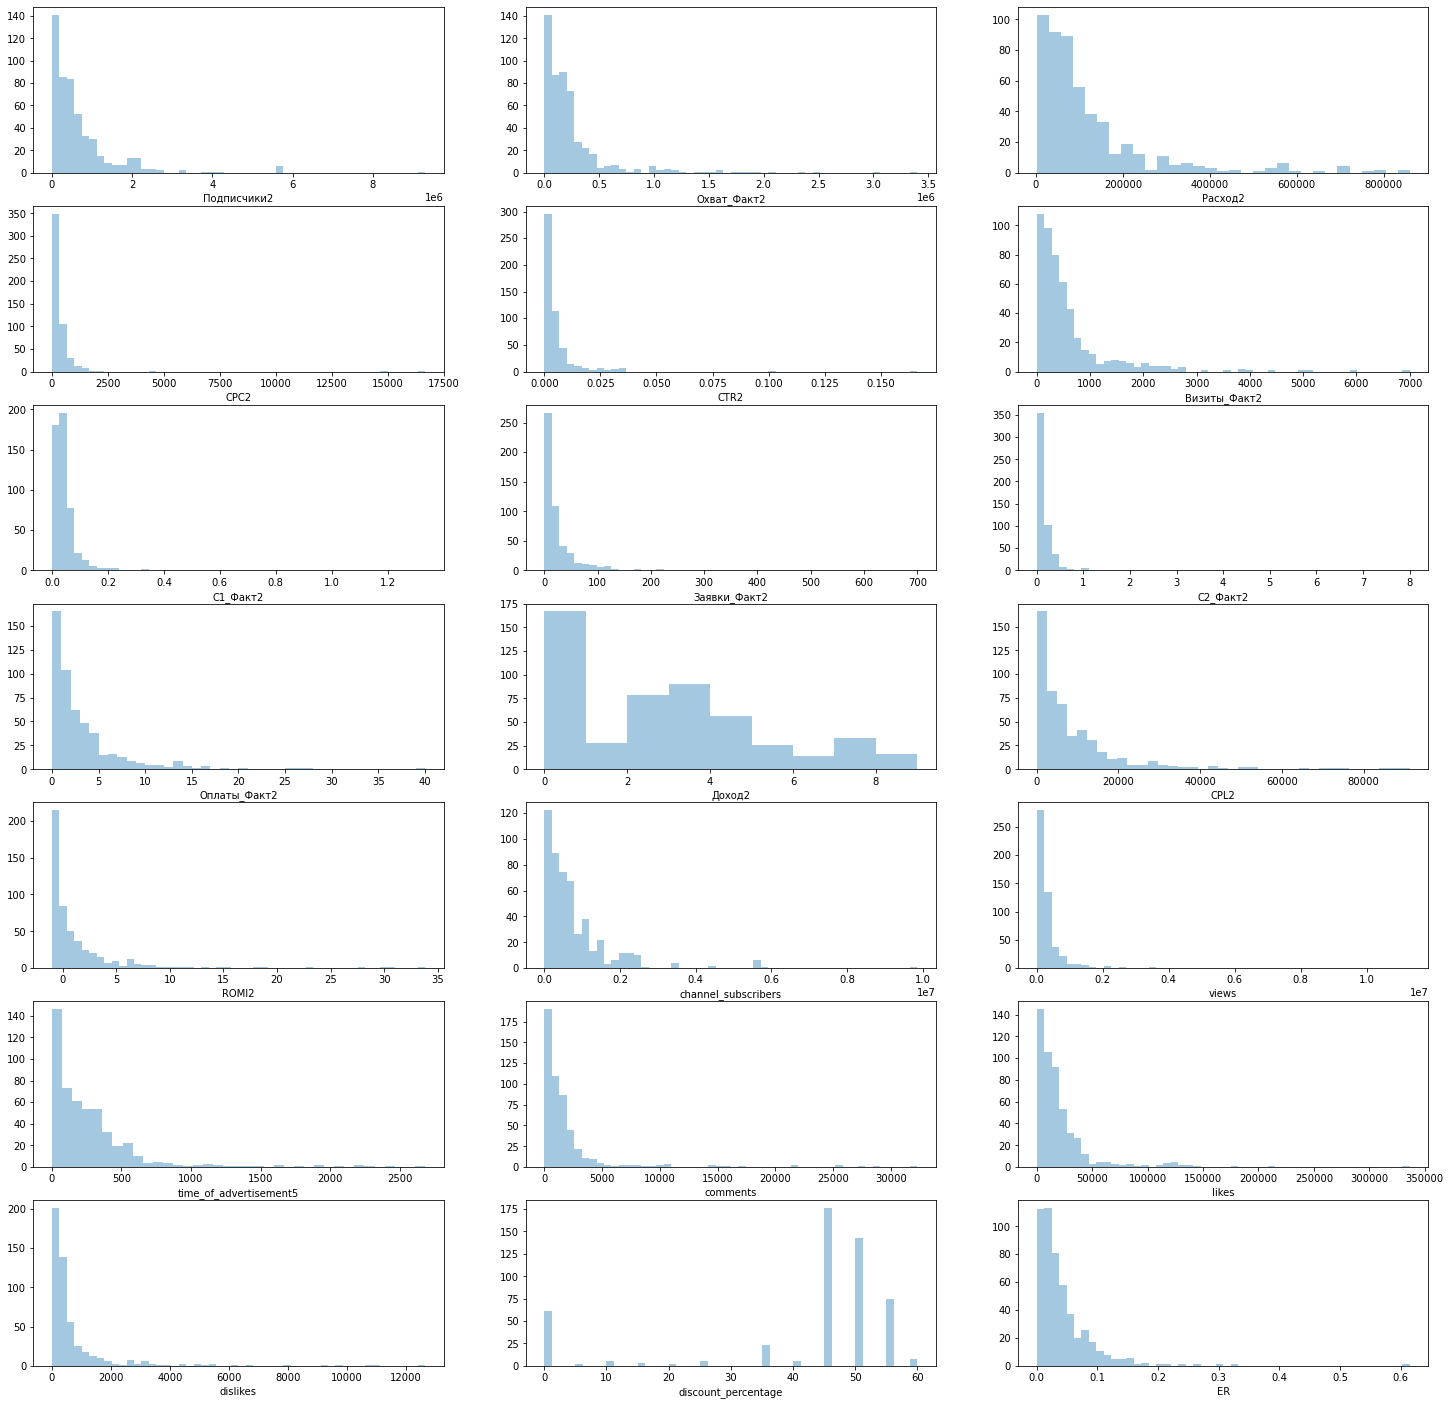

In [289]:
fig, axes = plt.subplots(7,3, figsize=(25,25))

for i,col in enumerate(num_cols):
    sns.distplot(data[col], kde=False, ax=axes.flat[i])

In [290]:
# Прологорифмировали все переменные:
# По графикам выше вдно, что распределения признаков не нормальные и сильно смещены,
# попробуем прологарифмировать все признаки модели, и посмотреть как это отразится на ее качестве:

data_model55 = data[[
 'Охват_Факт2',
 'Расход2',
    'CPC2',
  'CTR2',
  'С2_Факт2',
 'Оплаты_Факт2',
 'Доход2',
  'ROMI2',
 'channel_subscribers',
  'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
    'Линейка3_romi','год_romi','time_of_advertisement6_romi',
    
 
 
                  ]]
X = data_model55.drop(['ROMI2'], axis=1).values
X = np.log(X+2)
data_model55['ROMI2'] = data_model55['ROMI2']+2
y = data_model55['ROMI2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr = LinearRegression()
lr.fit(X_train, np.log(y_train ))
predict_test = np.exp(lr.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 25.84%


<ipython-input-290-cfdbabbbfad5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model55['ROMI2'] = data_model55['ROMI2']+2


In [291]:
# Модель на основе CatBoostRegressor дает наилучшее значение метрики
model = CatBoostRegressor(iterations = 10000,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, np.log(y_train ),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         plot=True
         )
predict_test = np.exp(model.predict(X_test))
print(f"Точность модели по метрике MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Точность модели по метрике MAPE: 11.31%


In [292]:
# Коэффициенты модели логарифмической регресии:
lr.coef_

array([ 1.34436568e-02, -2.99438291e-01, -7.55593426e-02,  1.54121397e+01,
        1.46641074e-01, -3.95924917e-02,  1.35876163e+00, -1.78201460e-02,
       -3.89836610e-04, -7.60819891e-02,  1.04528170e-01, -4.81285136e-03,
       -5.52586336e-02,  1.18830376e-01,  2.00980140e-01])

### Модель на основе CatBoostRegressor дает наилучшее значение метрики MAPE: 11.31%